Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.

Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin. 2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it. 3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin. 4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin. 5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin. 7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box. 8.) Class: Kecimen and Besni raisin.

Citation Request:

CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI: https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
pd.set_option('display.max.columns', 200)

# Reading in the csv

In [2]:
df = pd.read_csv("/content/Raisin_Dataset_csv.csv")

# Preparing the data

In [3]:
# Get the first 3 rows of the dataframe
df.head(3)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen

In [4]:
# Get the column labels of the Dataframe
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

In [5]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',\
       'ConvexArea', 'Extent', 'Perimeter', 'Class']

In [6]:
# Check the data type of each column
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [7]:
# Get the unique classes
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [8]:
# Tranform object dtype with numeric
df['Class'] = df['Class'].replace(('Kecimen', 'Besni'), (0,1))
df['Class'].unique()

array([0, 1])

In [9]:
# Check if there are any missing values
df.isna().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [10]:
# Check if the classes are balance or not
df['Class'].value_counts()

0    450
1    450
Name: Class, dtype: int64

# Analysing the data

For `Area, ConvexArea, MajorAxisLength, MinorAxisLength and Perimeter`, they are skewed to the right, given that there are outliners at the upper range, their mean are above the median, upper tail is longer than lower tail.

For `Eccentricity and Extent`, they are both skewed to the left, given that there are outliners at the lower range, their mean are below the median, lower tail is longer than upper tail.

In [11]:
#Generate descriptive statistics
df.describe()

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%     59348.000000       345.442898       219.111126      0.741766   
50%     78902.000000       407.803951       247.848409      0.798846   
75%    105028.250000       494.187014       279.888575      0.842571   
max    235047.000000       997.291941       492.275279      0.962124   

          ConvexArea      Extent    Perimeter       Class  
count     900.000000  900.000000   900.000000  900.000000  
mean    91186.090000    0.699508  1165.906636    0.500000  
std     40769.290132    0.053468   273.764315    0.500278  
min     26139.000000    0.379856   619.074000    0.000000  
25%     61513.250000    0.670869   966.410750    0.000000  
50%     81651.000000    0.707367  1119.509000    0.500000  
75%    108375.750000    0.734991  1308.389750    1.000000  
max    278217.000000    0.835455  2697.753000    1.000000

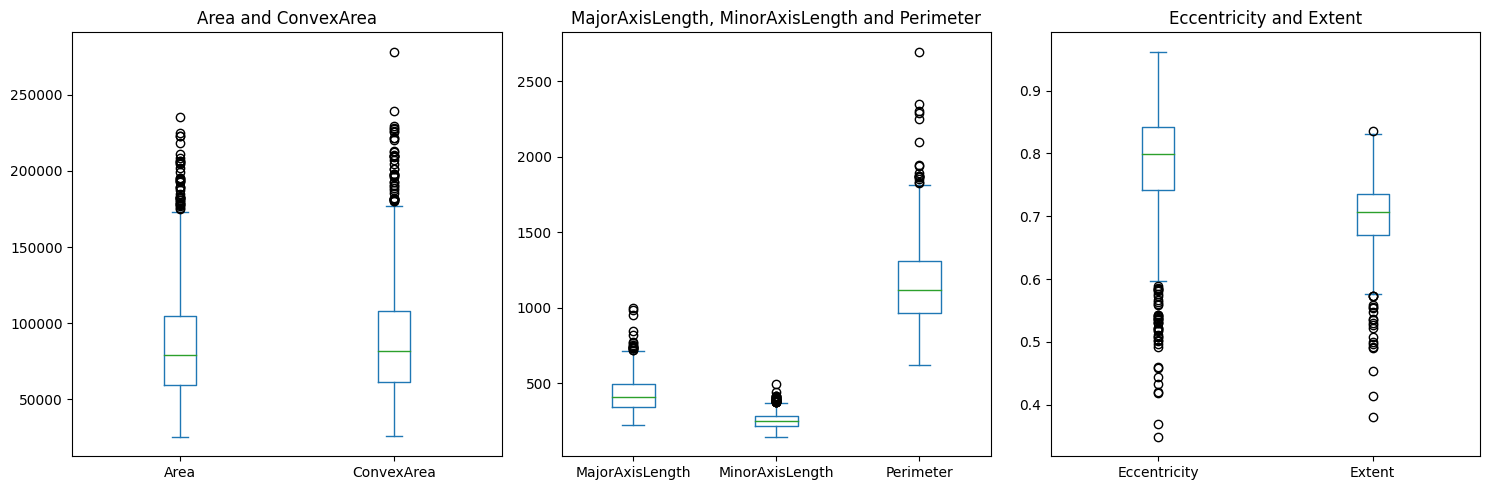

In [12]:
#Data visualization
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df_subset = df[['Area', 'ConvexArea']]
df_subset.plot(ax = ax1, kind = 'box', title = 'Area and ConvexArea')
df_subset2 = df[['MajorAxisLength', 'MinorAxisLength', 'Perimeter']]
df_subset2.plot(ax = ax2, kind = 'box', title = 'MajorAxisLength, MinorAxisLength and Perimeter')
df_subset3 = df[['Eccentricity', 'Extent']]
df_subset3.plot(ax = ax3, kind = 'box', title = 'Eccentricity and Extent')
plt.tight_layout()

In [13]:
#Identify the outliers
df.query('Area > 200000')

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
487  210923       984.045491       367.279532      0.927737      278217   
507  208264       675.098345       395.579291      0.810341      212813   
516  202118       684.602958       379.719282      0.832080      209242   
552  204864       596.639802       440.497127      0.674476      209457   
580  206720       713.472549       373.642544      0.851905      210114   
581  205497       632.727607       414.188326      0.755969      209486   
668  206689       746.145341       355.300685      0.879347      212569   
708  222915       731.559406       389.946700      0.846093      227170   
711  204226       648.204288       402.283271      0.784118      207198   
804  223075       694.247550       411.810369      0.805073      225916   
812  235047       772.956877       388.201507      0.864735      239093   
866  225043       740.003743       390.300858      0.849598      229195   
880  218459       571.289203       492.275279      0.507432      228259   

       Extent  Perimeter  Class  
487  0.507352   2697.753      1  
507  0.771748   1755.167      1  
516  0.717219   1827.900      1  
552  0.751009   1726.246      1  
580  0.780576   1866.091      1  
581  0.769289   1736.839      1  
668  0.745809   1876.028      1  
708  0.770543   1876.307      1  
711  0.773988   1724.662      1  
804  0.764940   1812.569      1  
812  0.711673   1942.050      1  
866  0.744187   1853.893      1  
880  0.731974   1947.460      1

In [14]:
#Identify the outliers
df.query('Eccentricity < 0.5')

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
23   61251       301.507790       273.659941      0.419754       64732   
34   46427       253.842028       235.906824      0.369212       48275   
43   92384       368.406214       320.714579      0.492087       93772   
106  48945       269.370411       239.162166      0.460121       51456   
156  45962       251.133384       235.368076      0.348730       47173   
192  37569       232.427848       208.152006      0.444950       38874   
197  86545       350.127874       315.719520      0.432307       87512   
251  45598       259.896265       225.656220      0.496118       47266   
316  55746       280.313124       254.600330      0.418382       56989   
356  58460       290.753556       258.384354      0.458545       60254   

       Extent  Perimeter  Class  
23   0.643596    971.769      0  
34   0.684219    844.312      0  
43   0.749007   1135.662      0  
106  0.711244    872.289      0  
156  0.742280    810.195      0  
192  0.794371    734.102      0  
197  0.785887   1070.062      0  
251  0.741286    813.276      0  
316  0.730654    875.659      0  
356  0.774756    908.357      0

We can see that for class Besni, all the features, except Eccentricity, are more spread out.

However, the most standout differences between two classes are Area and and Perimeter (More spread out for Besni, while significantly narrower for Kecimen. Also if eyeballing the mean, there are outstanding difference between two classes.)

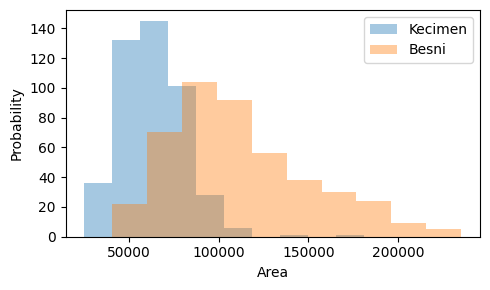

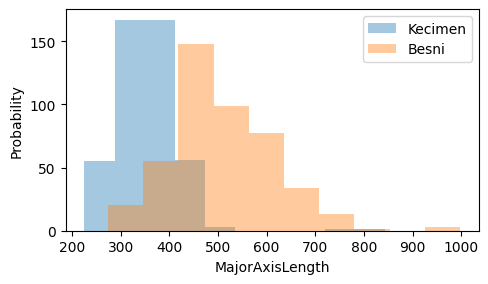

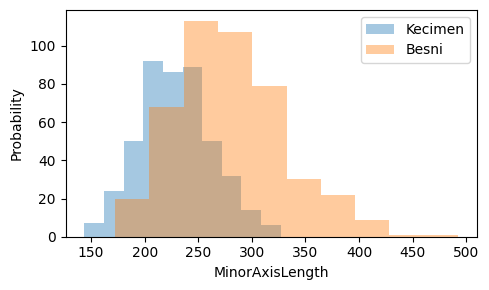

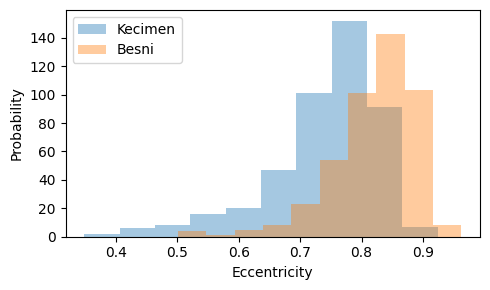

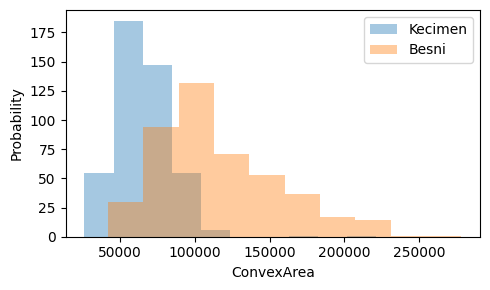

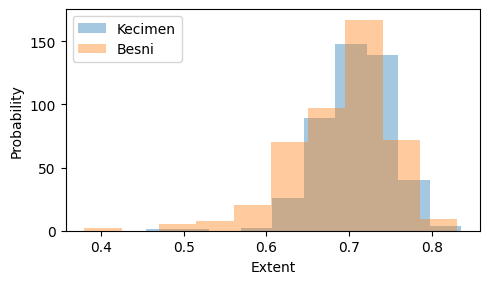

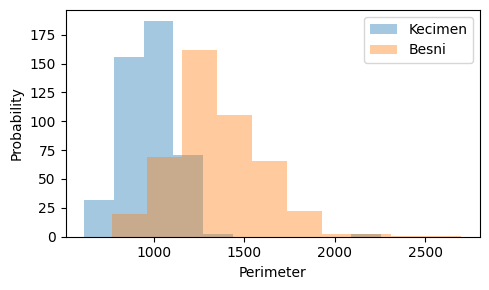

In [15]:
#Compare the distribution between classes
for labels in cols[:-1]:
    plt.figure(figsize = (5, 3))
    plt.hist(df[df['Class']==0][labels], alpha = 0.4, label='Kecimen')
    plt.hist(df[df['Class']==1][labels], alpha = 0.4, label='Besni')
    plt.legend()
    plt.xlabel(labels)
    plt.ylabel('Probability')
    plt.tight_layout()
    plt.show()

#Spliting the data into two sets and normalise the data

In [16]:
# Import modules
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Define the features and target
X = df[cols[0:-1]]
y = df[cols[-1]]

In [18]:
# Normalise the data
scaler = MinMaxScaler()
scaler.fit(X)
scaler.transform(X)

array([[0.29637031, 0.28071404, 0.314376  , ..., 0.25550425, 0.83142179,
        0.27179088],
       [0.23742726, 0.23463777, 0.28494465, ..., 0.20886392, 0.66785449,
        0.24184205],
       [0.31226271, 0.2807413 , 0.35177845, ..., 0.26808369, 0.56575414,
        0.28359405],
       ...,
       [0.3542402 , 0.26705647, 0.44504387, ..., 0.31785796, 0.79289651,
        0.32412604],
       [0.32498331, 0.32490187, 0.31691469, ..., 0.2836979 , 0.61225439,
        0.3076348 ],
       [0.28723648, 0.37121445, 0.20530238, ..., 0.25015273, 0.55347831,
        0.3145209 ]])

In [19]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, \
                                                    test_size = 0.3, \
                                                    random_state = 42)

In [20]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

630 270 630 270


#Building the models

The random forest performs better than the other models (logistic regression, support vector machine, Kth nearest neighbor, and naive Bayes) with a 86% accuracy.

In [21]:
def classification(model, X_train, y_train, X_test, y_test):
    '''This function will process the user provided data and return the classification report.'''
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

In [22]:
# Logistic regression
classification(model = LogisticRegression(),
              X_train = X_train,
              y_train = y_train,
              X_test = X_test,
              y_test = y_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       141
           1       0.83      0.87      0.85       129

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



In [23]:
# Import the module
from sklearn.svm import SVC

# Get the SVC (Support Vector Machine) classification report
classification(model = SVC(),
              X_train = X_train,
              y_train = y_train,
              X_test = X_test,
              y_test = y_test)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.86      0.83      0.84       129

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



In [24]:
# Import the module
from sklearn.neighbors import KNeighborsClassifier

# Get the K Nearest Neighbor classification report
classification(model = KNeighborsClassifier(n_neighbors = 5),
              X_train = X_train,
              y_train = y_train,
              X_test = X_test,
              y_test = y_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       141
           1       0.83      0.86      0.85       129

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



In [25]:
# Import the module
from sklearn.naive_bayes import GaussianNB

# Get the Naive Bayes classification report
classification(model = GaussianNB(),
              X_train = X_train,
              y_train = y_train,
              X_test = X_test,
              y_test = y_test)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       141
           1       0.88      0.80      0.84       129

    accuracy                           0.85       270
   macro avg       0.86      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270



In [26]:
# Import module
from sklearn.ensemble import RandomForestClassifier

In [28]:
#Run classifier with different max_depth values and numbers of trees to see the effect on feature importance.
max_depth_vals = [2,3,4,5,10]
n_estimators_vals = [10,100]
for estimator in n_estimators_vals:
    for depth in max_depth_vals:
        rf_model = RandomForestClassifier(n_estimators = estimator, \
                                          max_depth = depth, \
                                          random_state = 42)
        rf_model.fit(X_train, y_train)
        y_pred = rf_model.predict(X_test)
        print(f'n_estimators: {estimator}, max_depth: {depth},\n{classification_report(y_test, y_pred)}')

n_estimators: 10, max_depth: 2,
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.85      0.84      0.84       129

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270

n_estimators: 10, max_depth: 3,
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       141
           1       0.84      0.84      0.84       129

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270

n_estimators: 10, max_depth: 4,
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.86      0.83      0.84       129

    accuracy                           0.85       270
   macro avg       0.85      0.8

In [29]:
#Using the hyperparameters with the best accuracy and f1-score(harmonic mean of Precision and Recall) from the above code.
rf_model = RandomForestClassifier(n_estimators = 100, \
                  max_depth = 2, \
                  random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       141
           1       0.84      0.88      0.86       129

    accuracy                           0.86       270
   macro avg       0.86      0.86      0.86       270
weighted avg       0.86      0.86      0.86       270



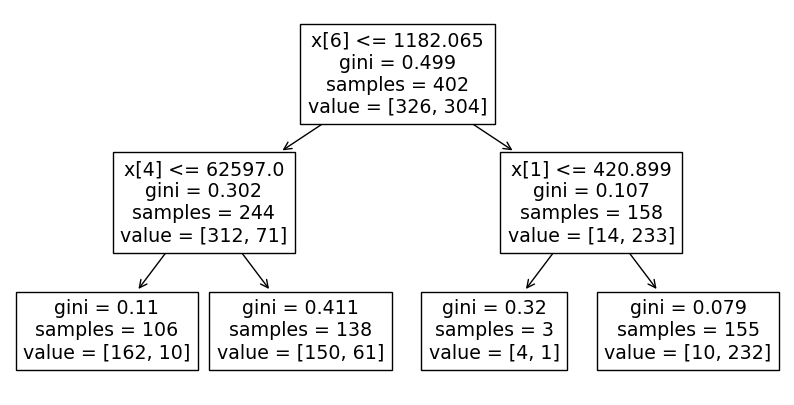

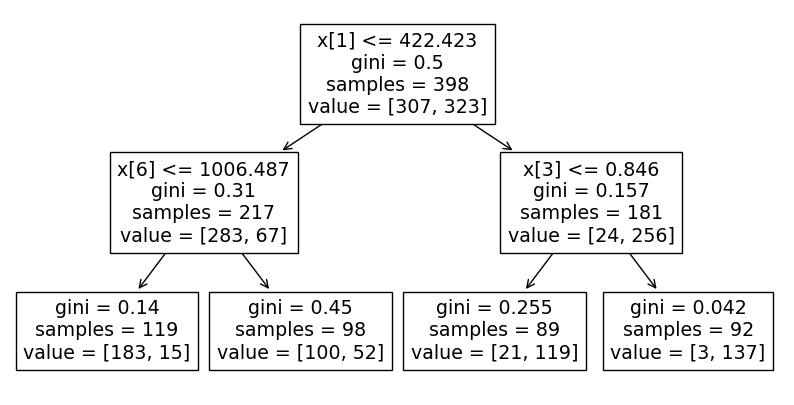

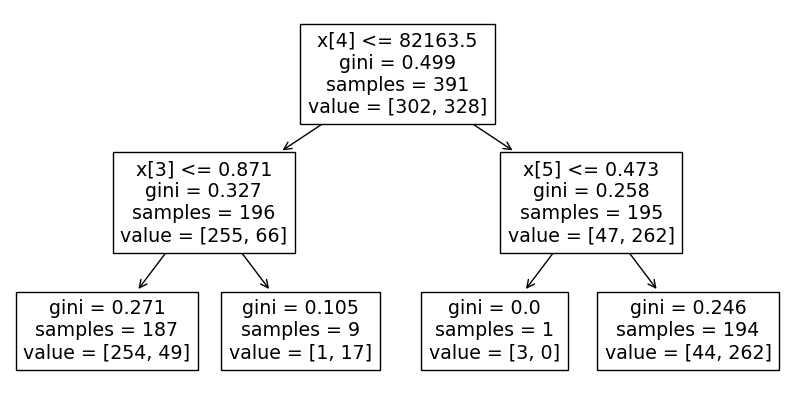

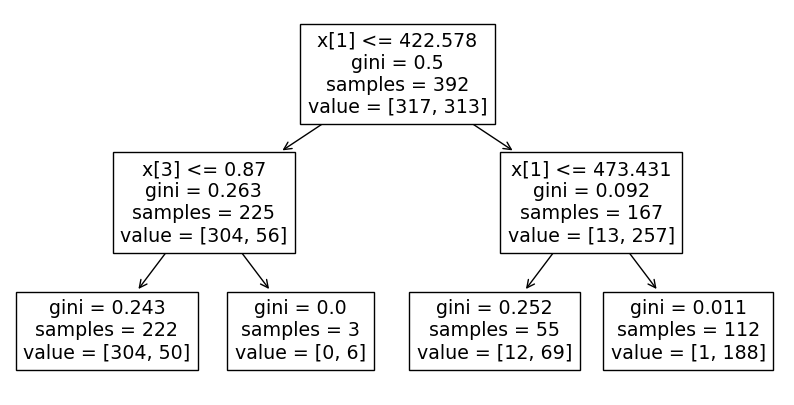

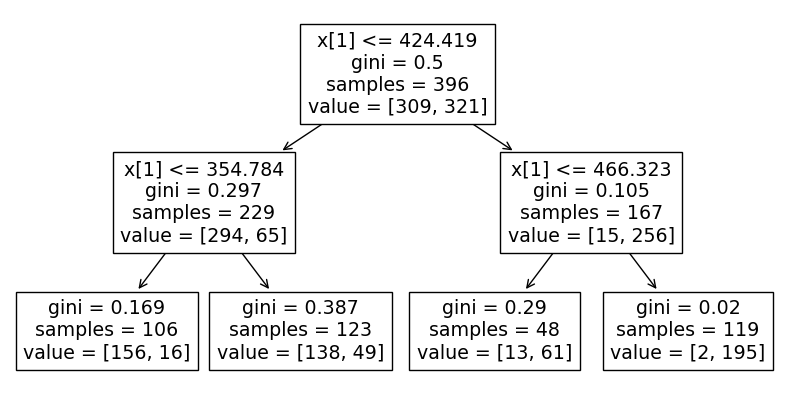

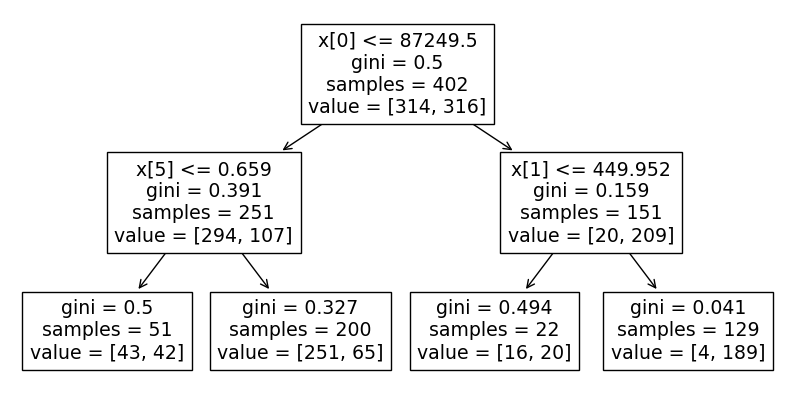

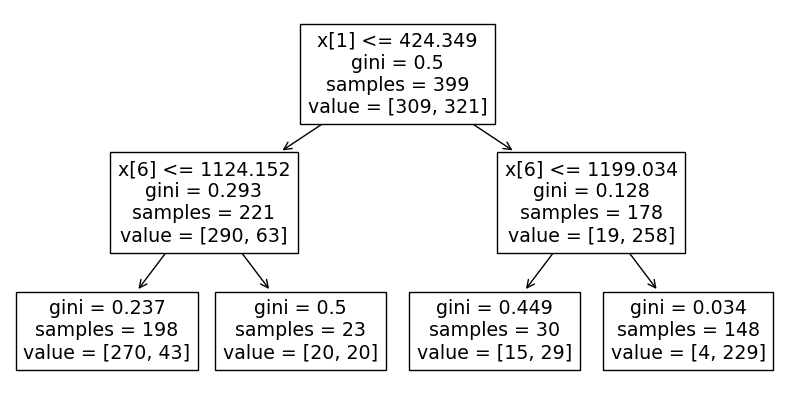

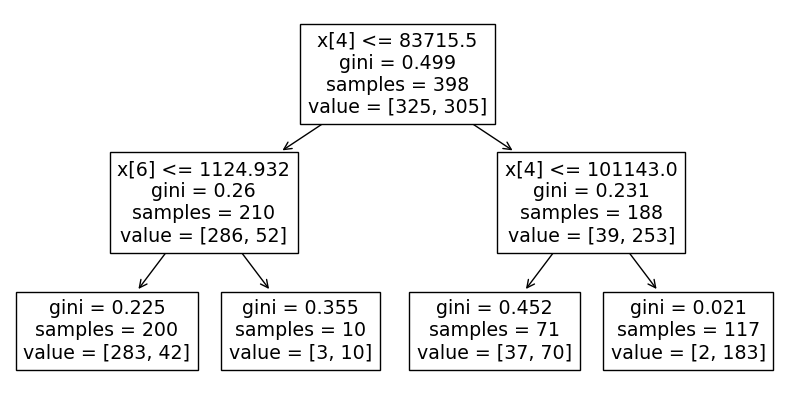

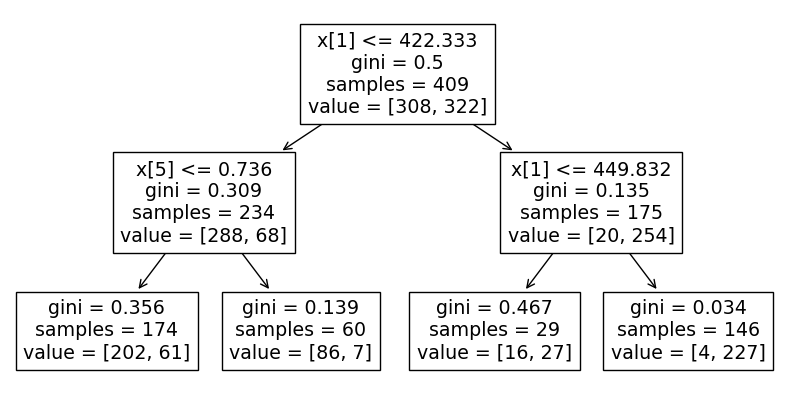

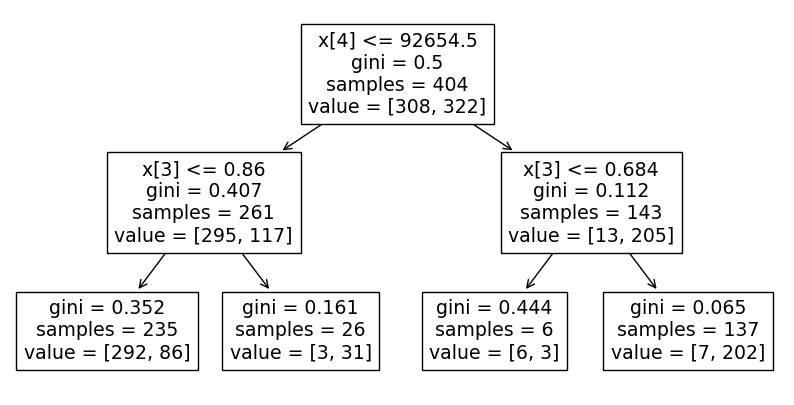

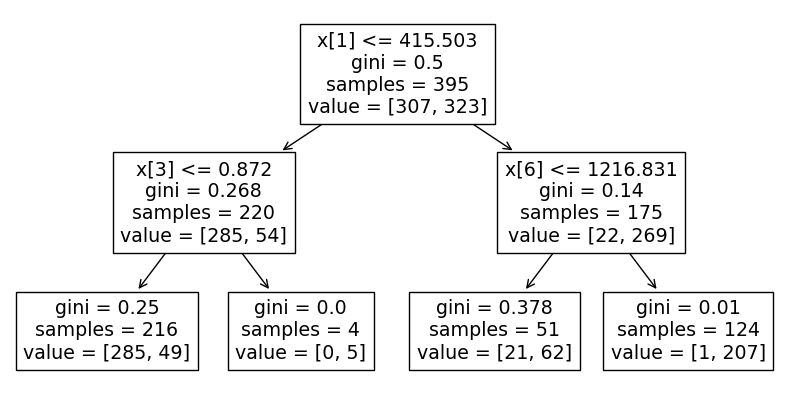

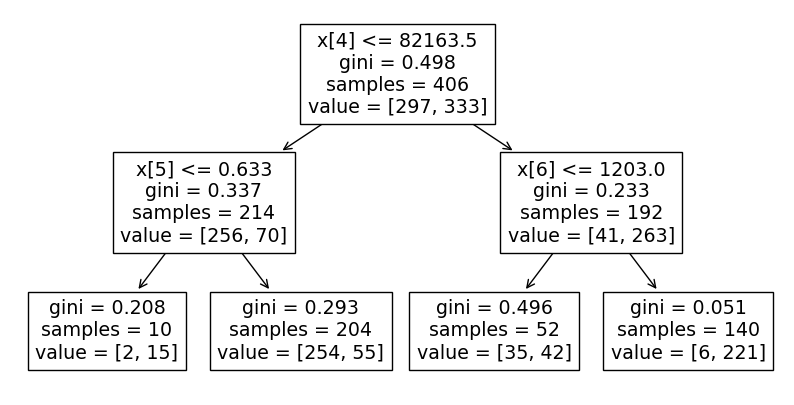

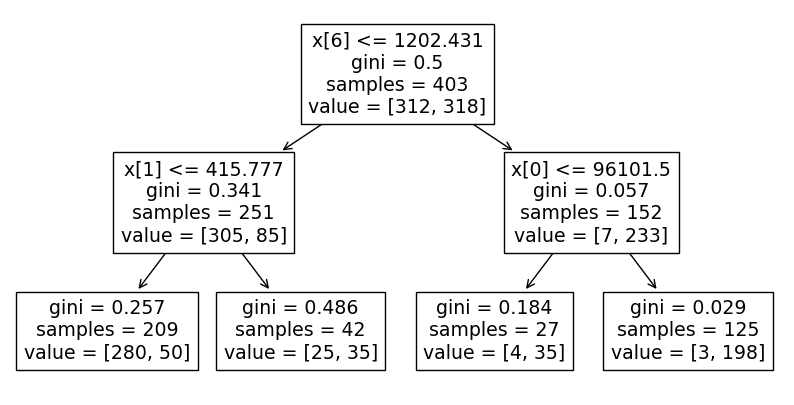

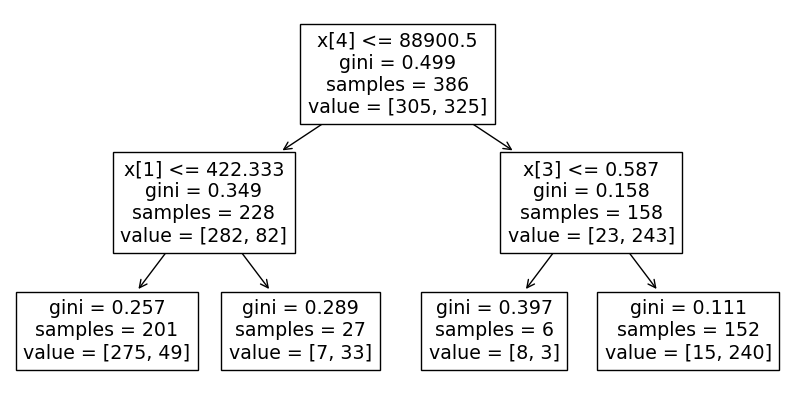

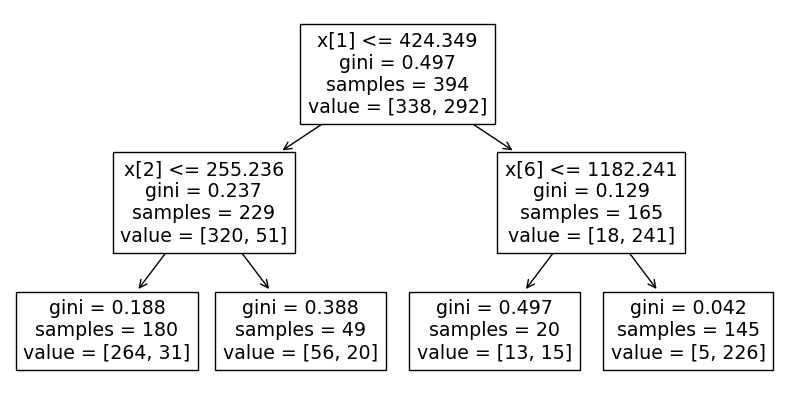

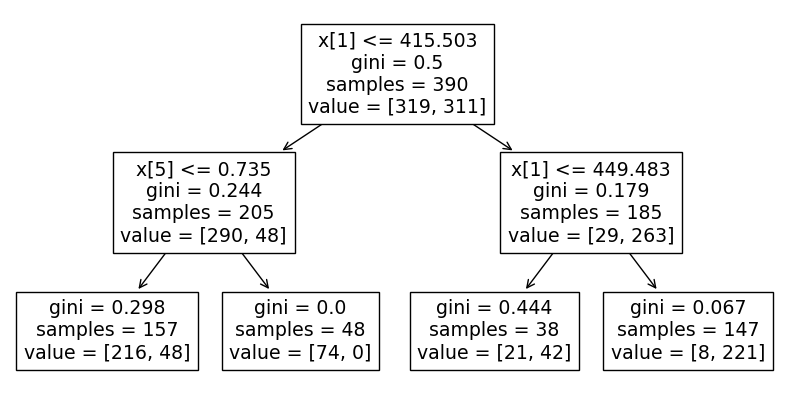

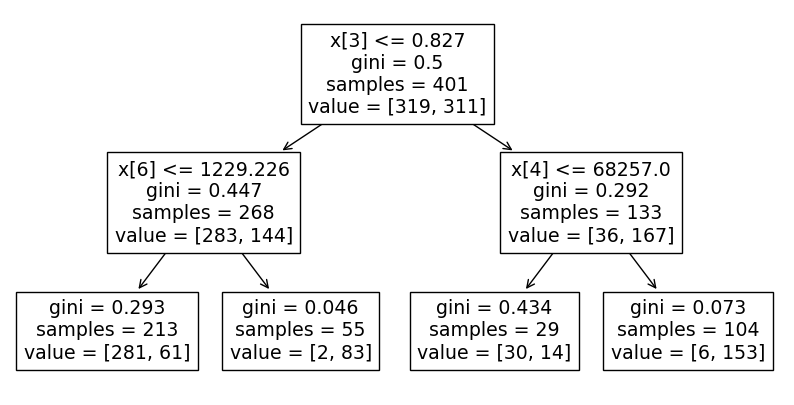

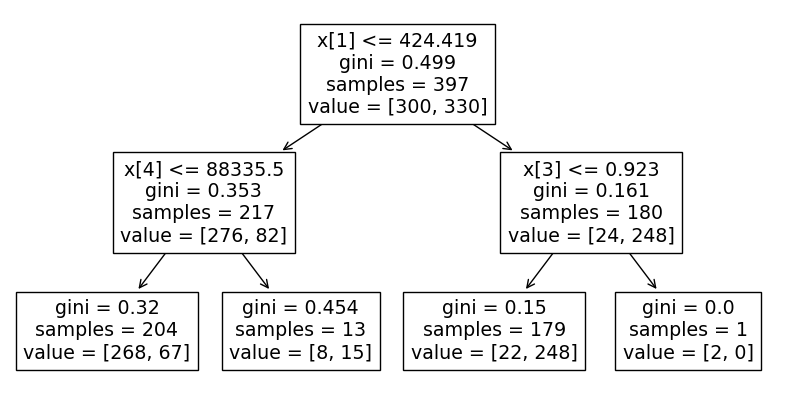

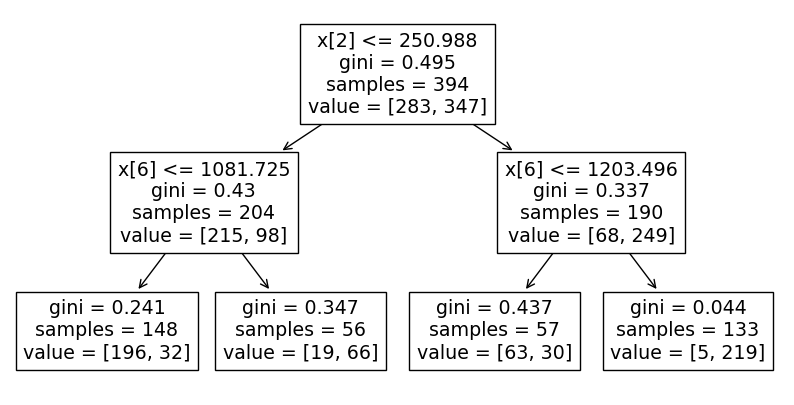

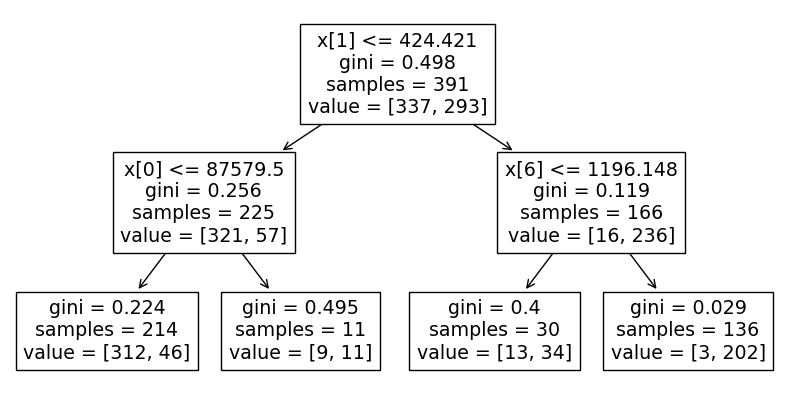

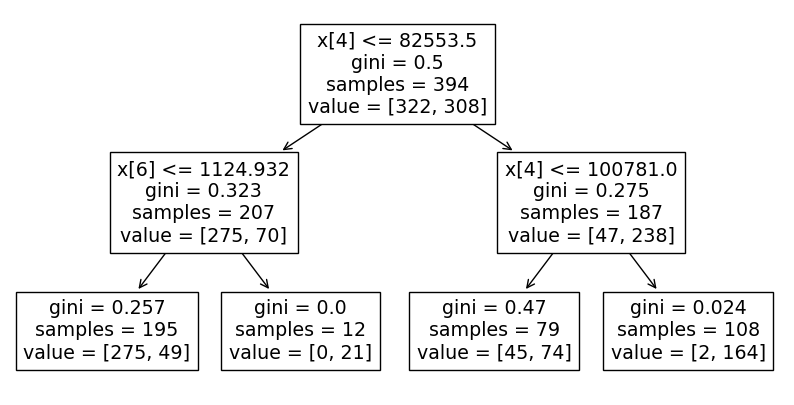

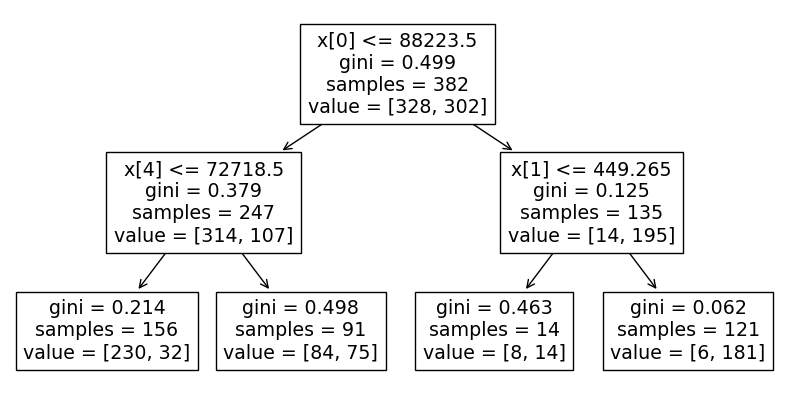

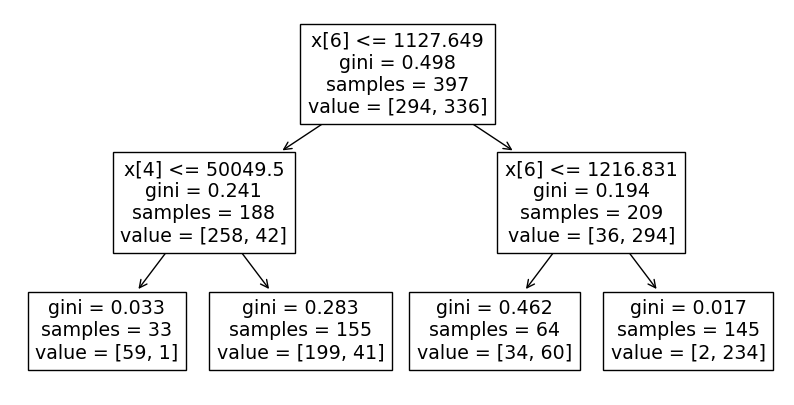

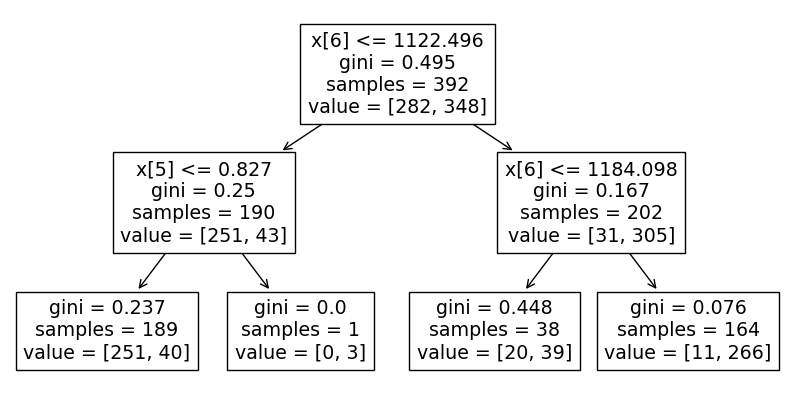

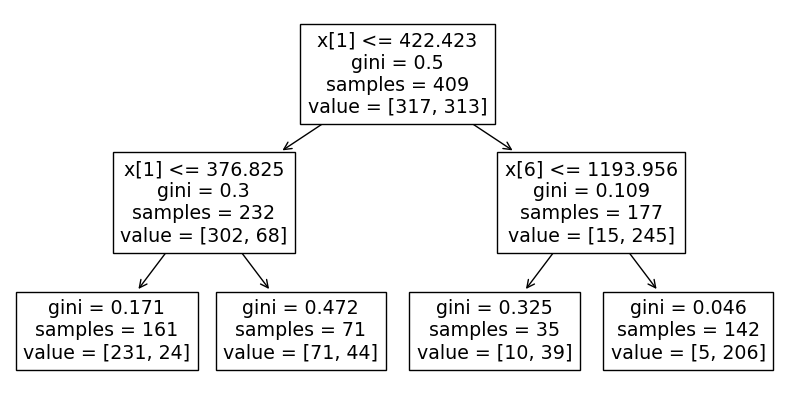

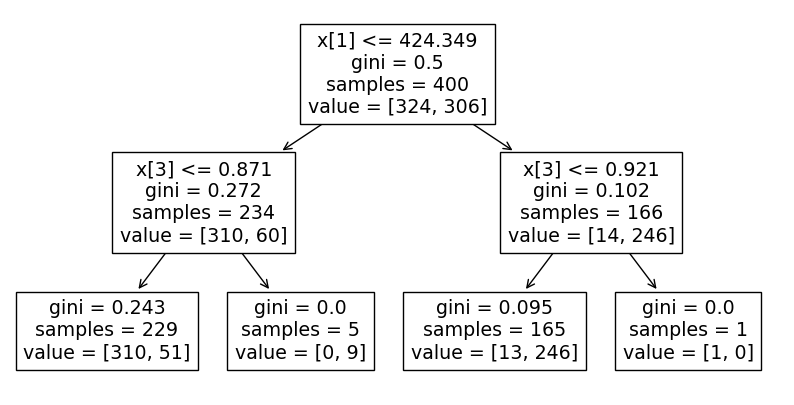

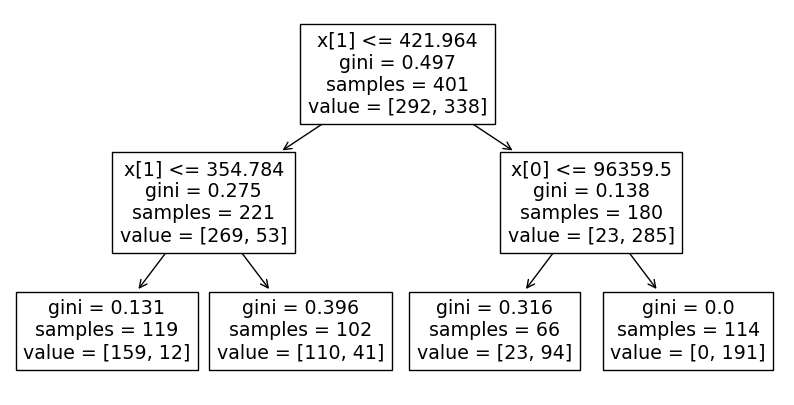

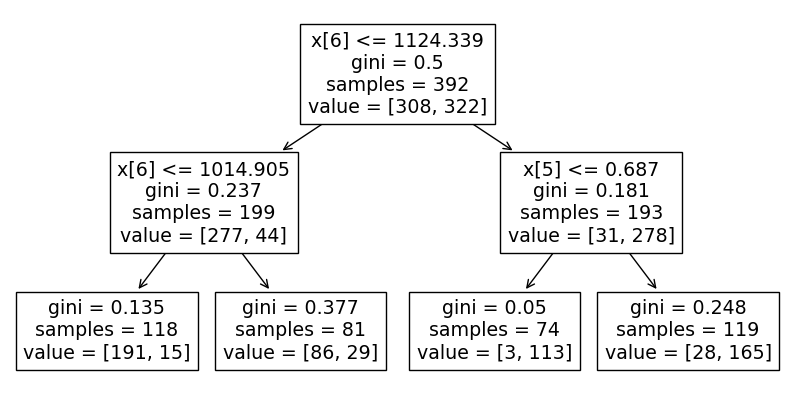

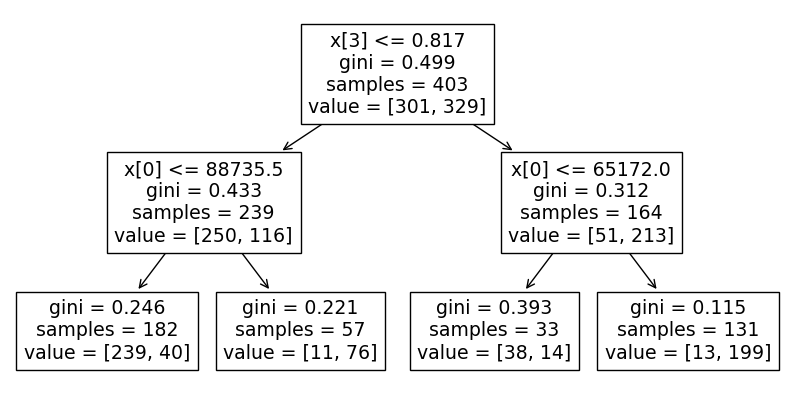

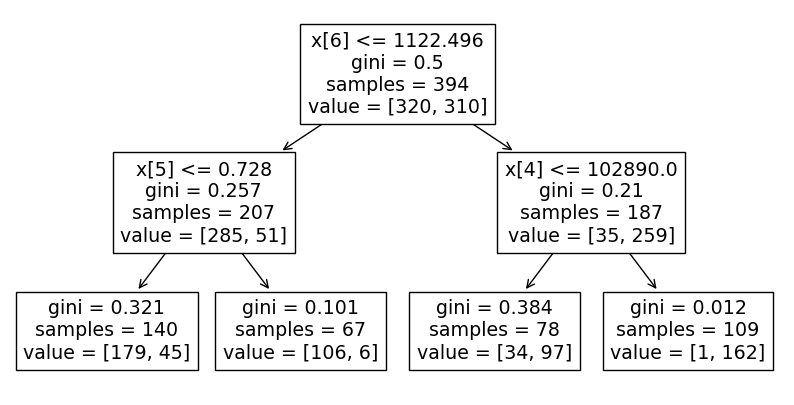

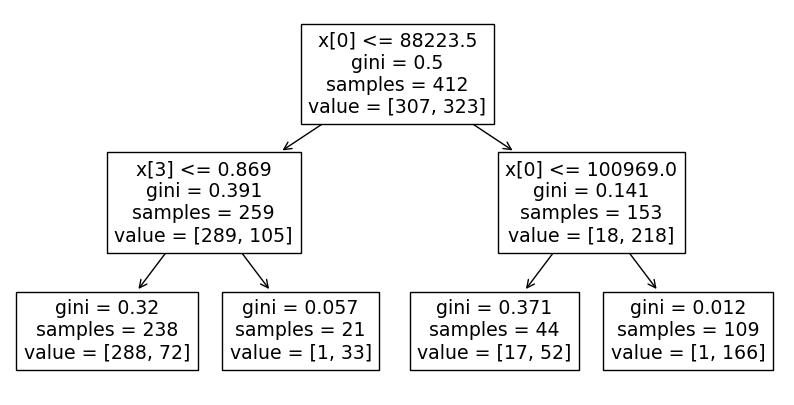

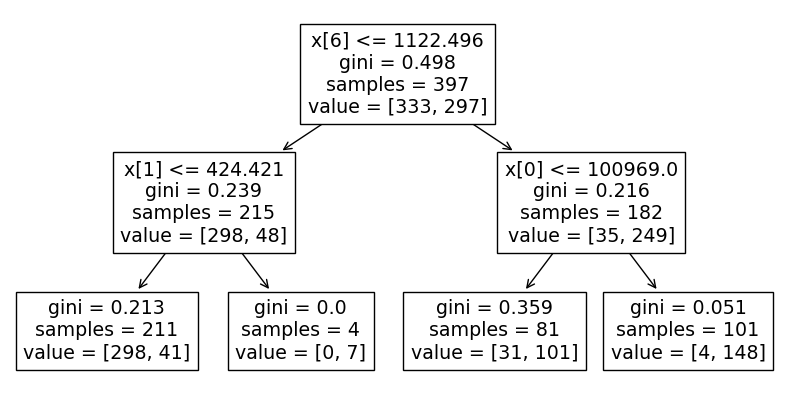

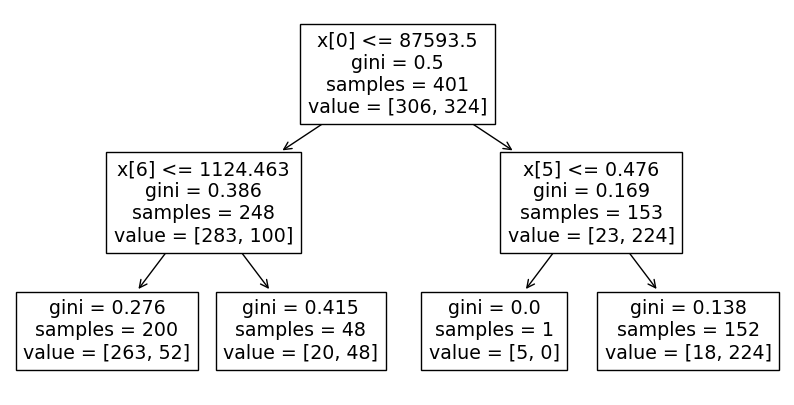

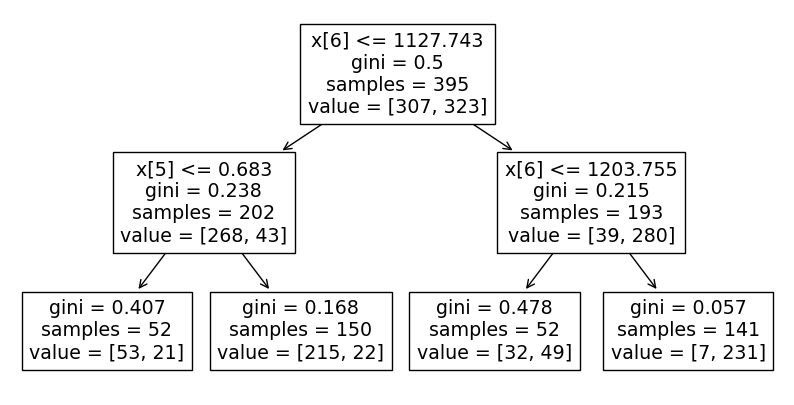

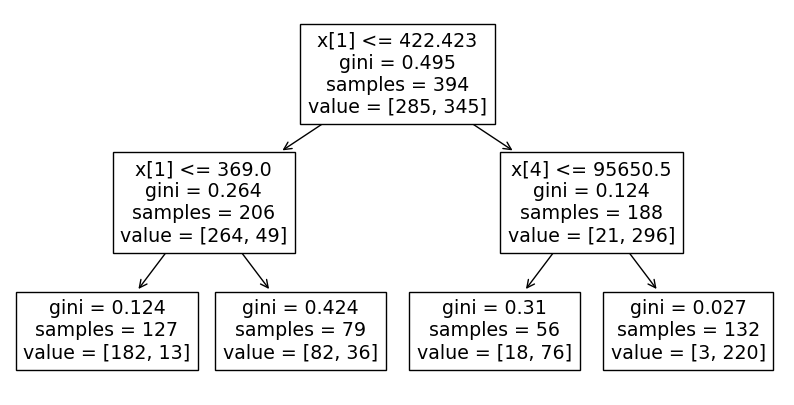

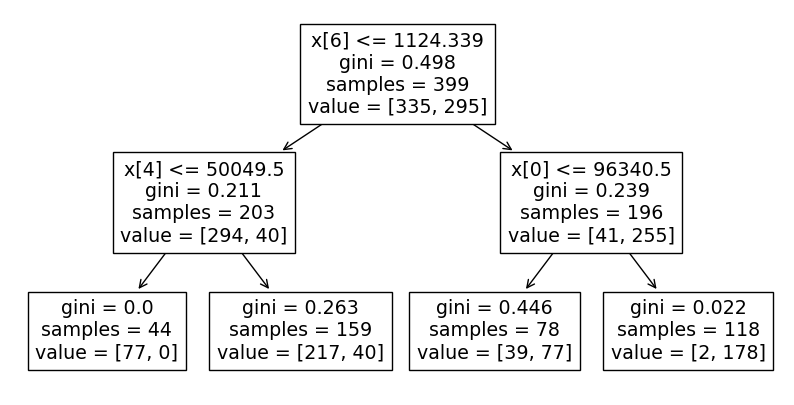

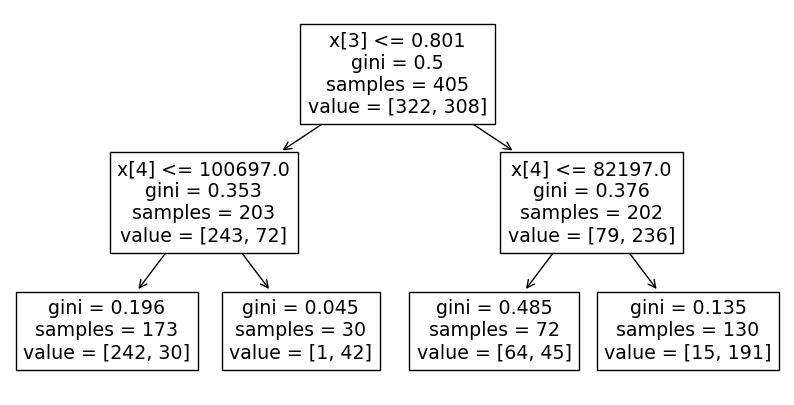

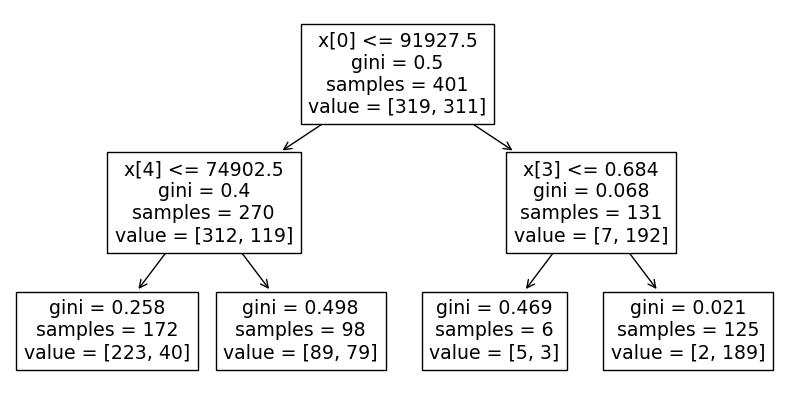

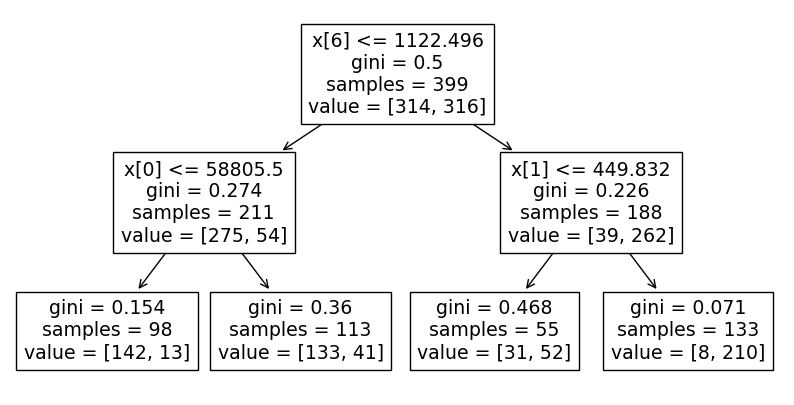

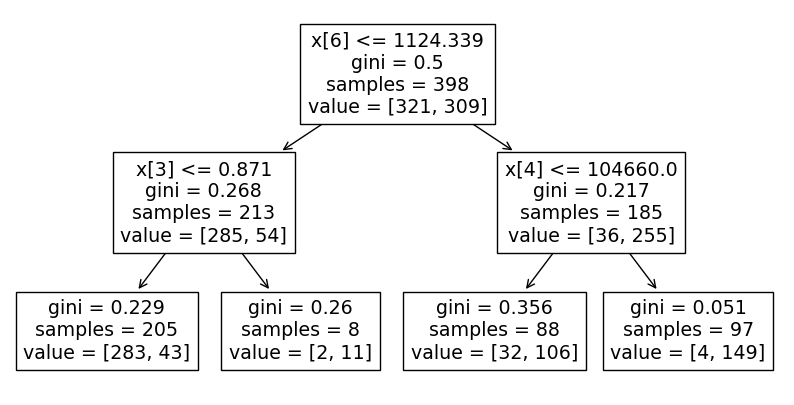

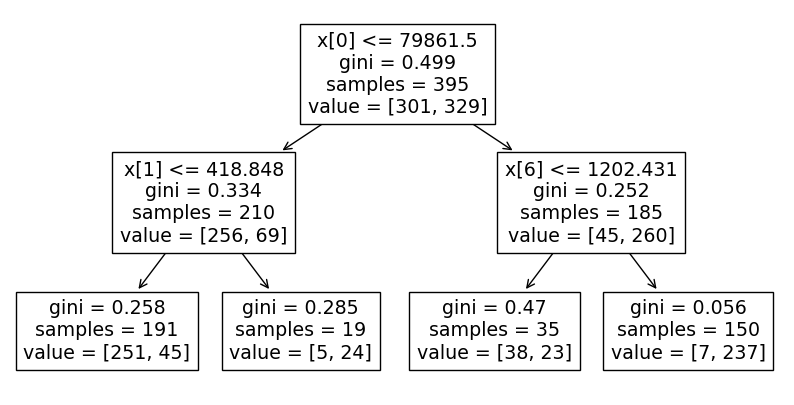

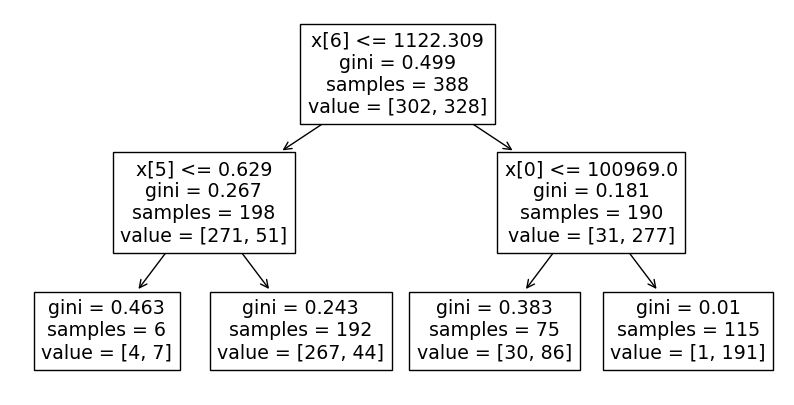

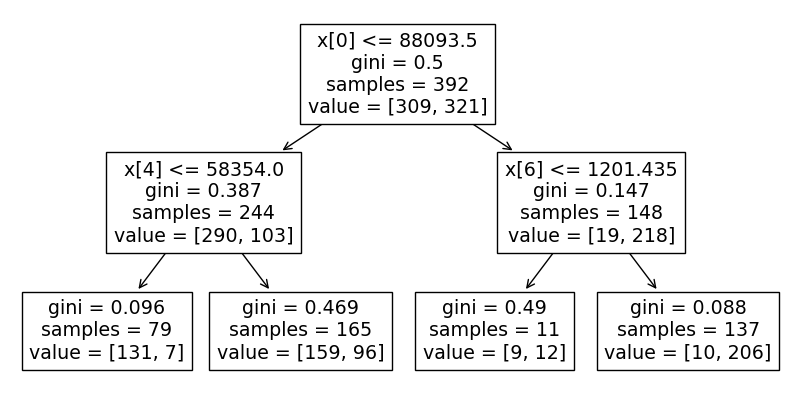

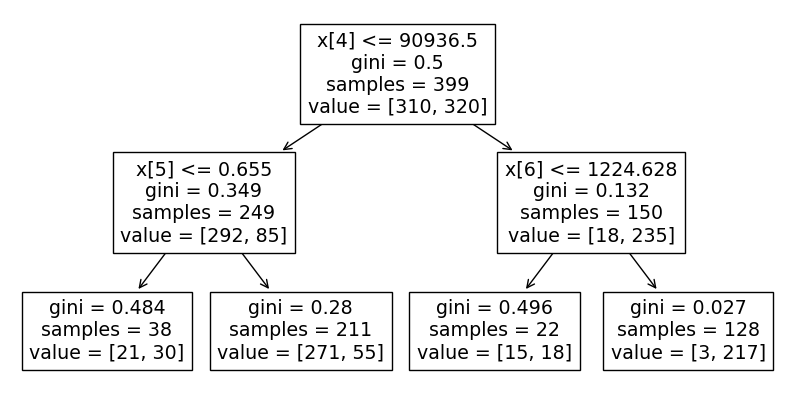

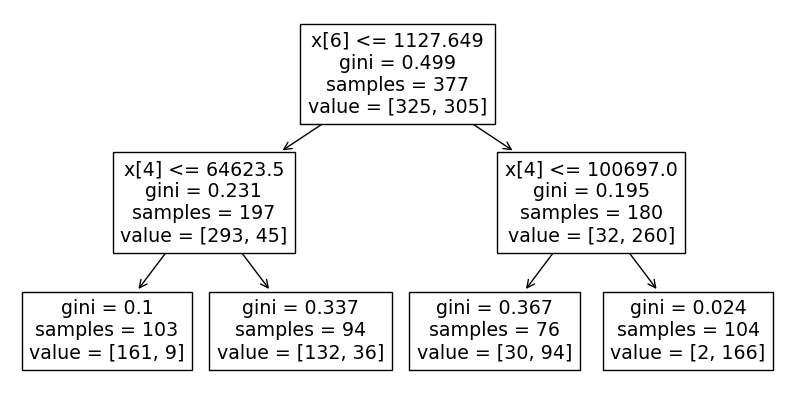

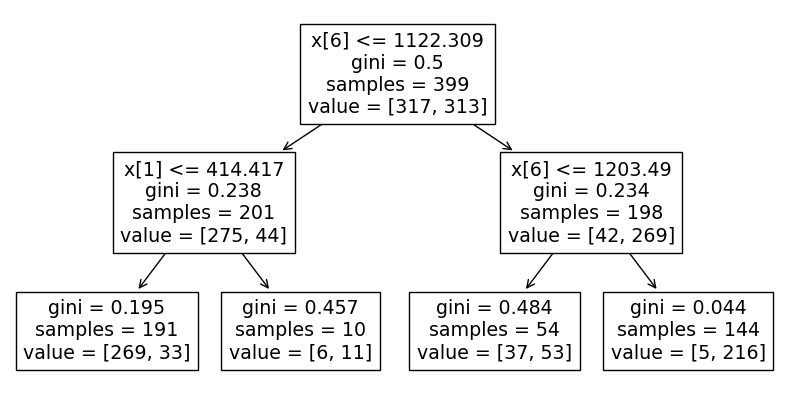

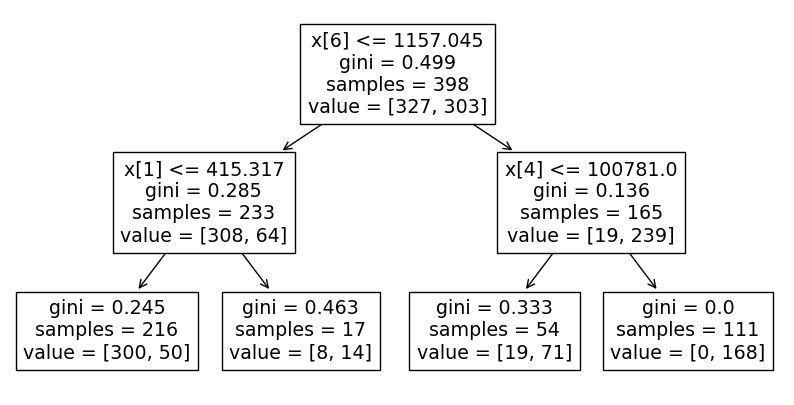

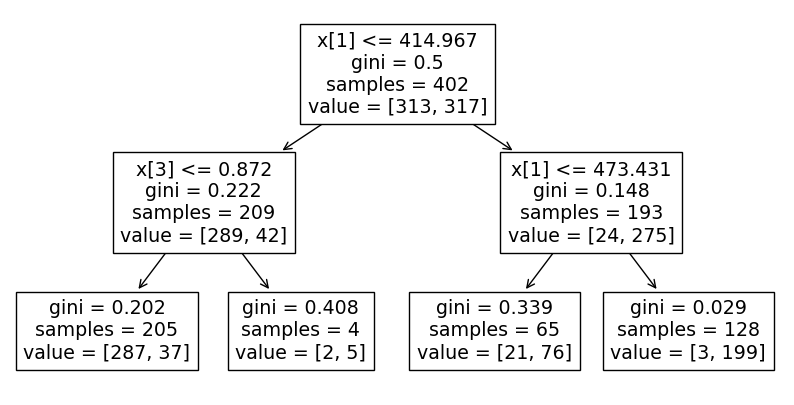

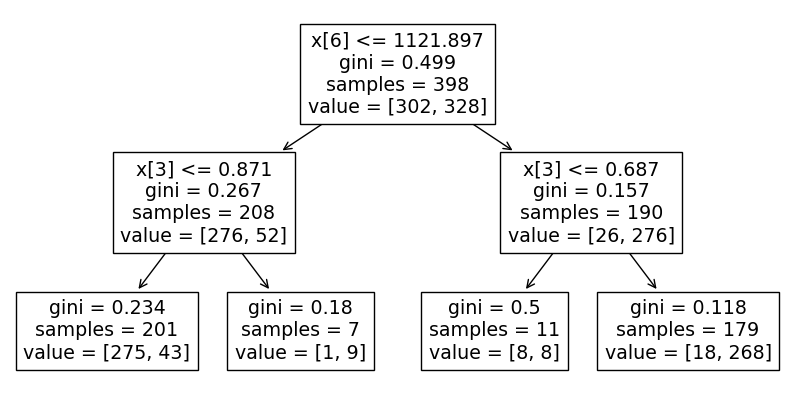

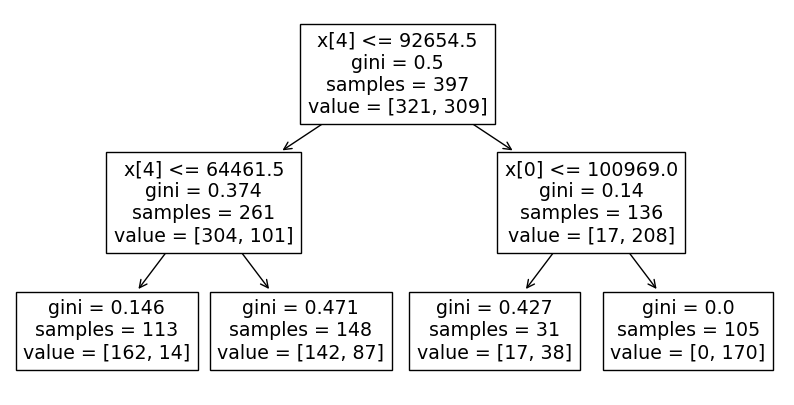

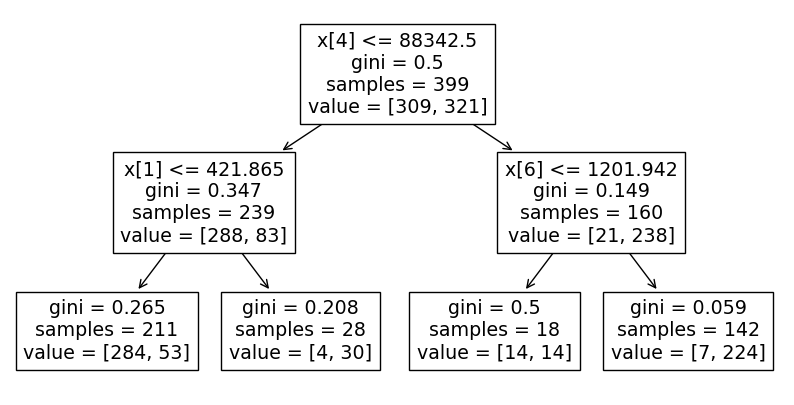

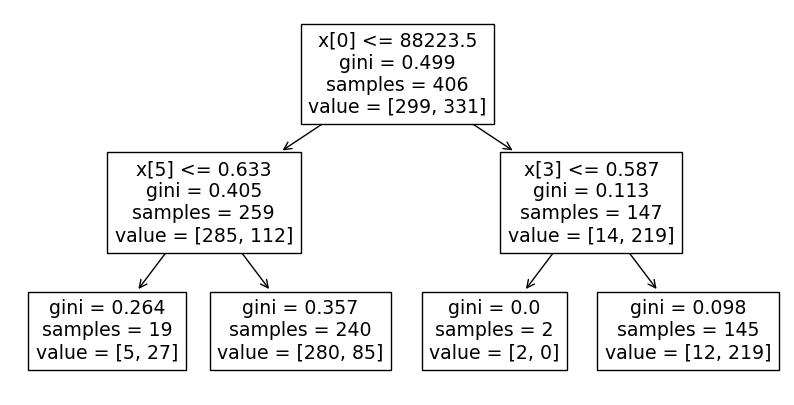

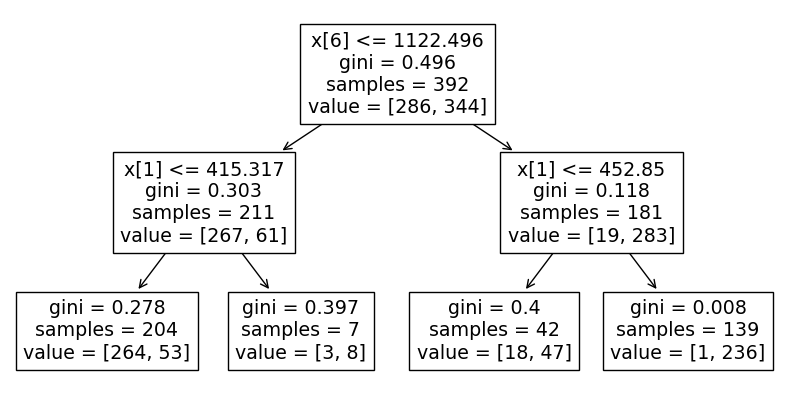

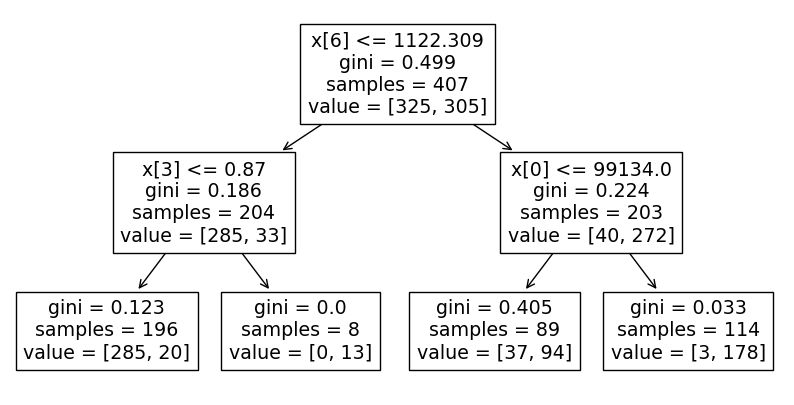

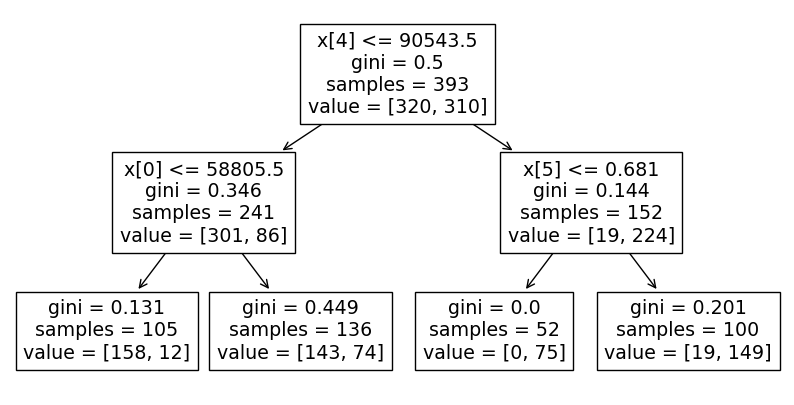

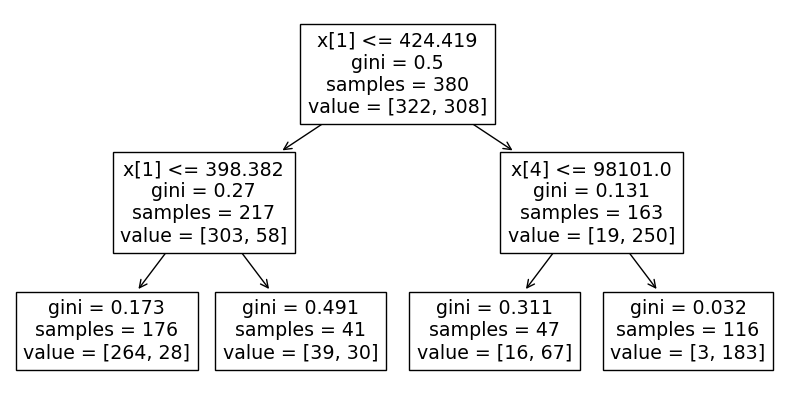

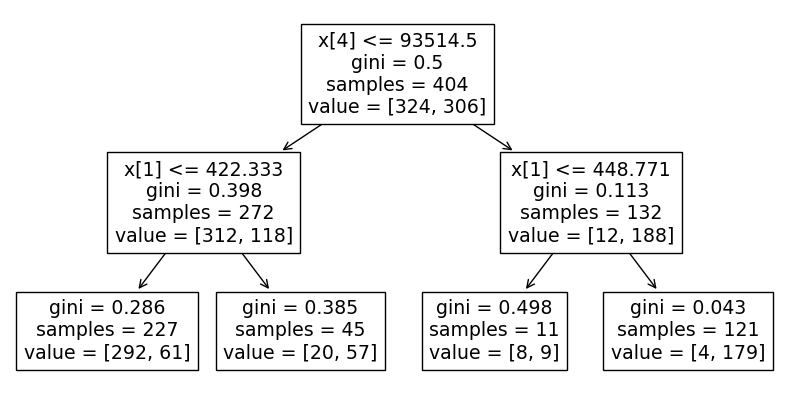

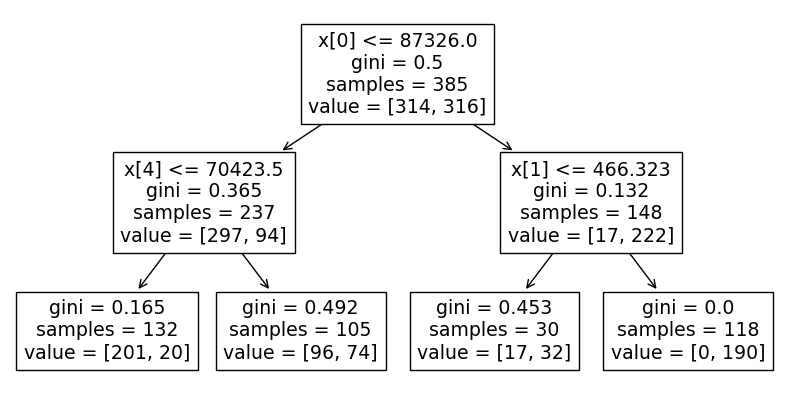

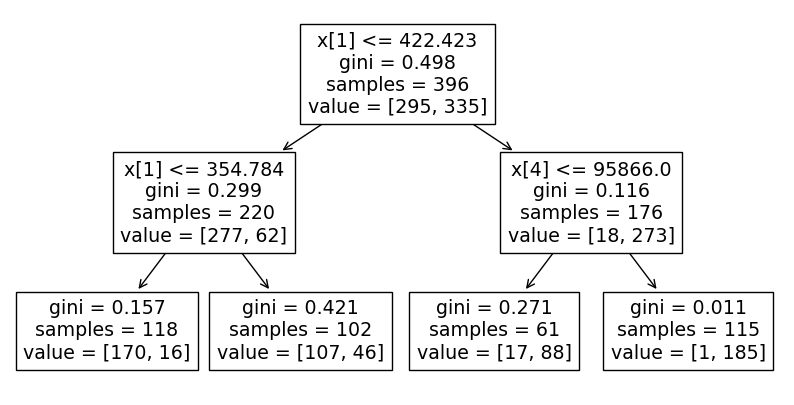

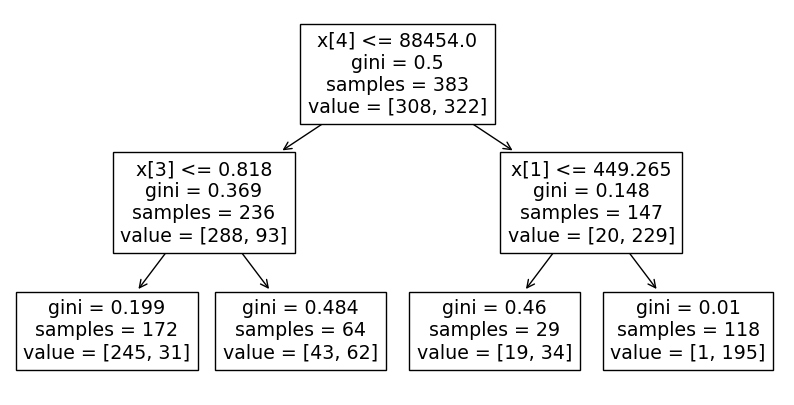

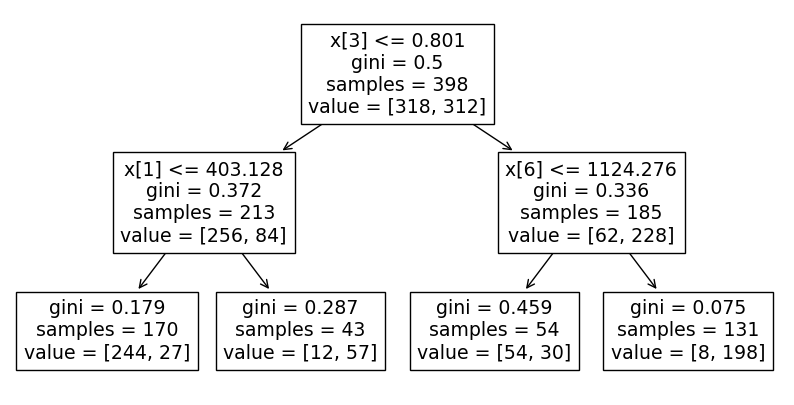

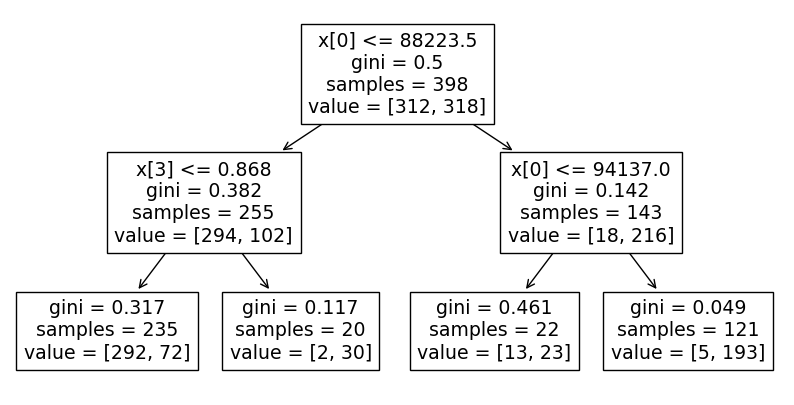

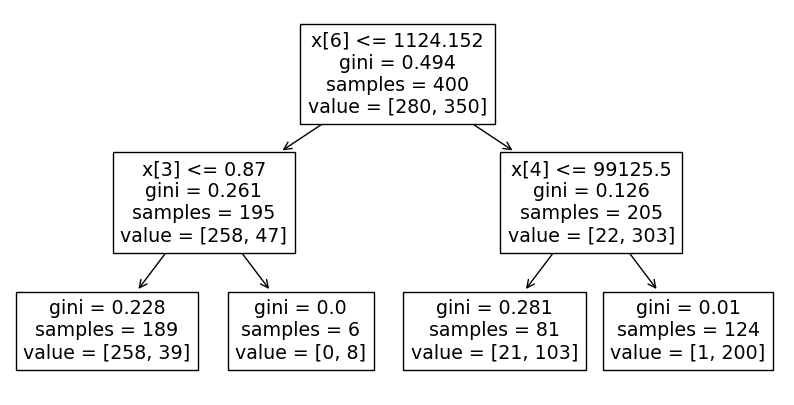

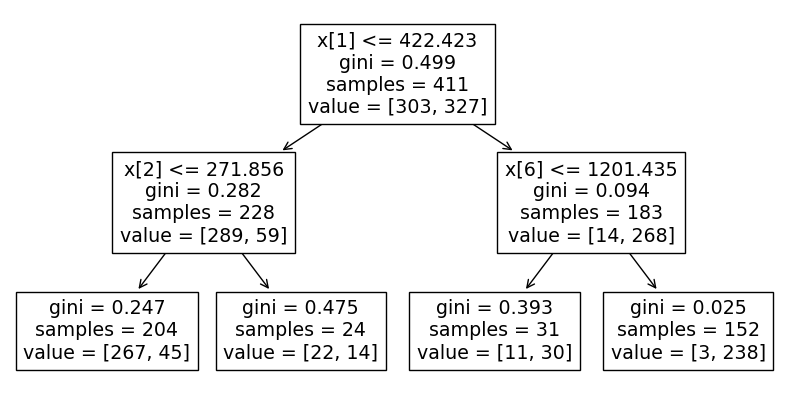

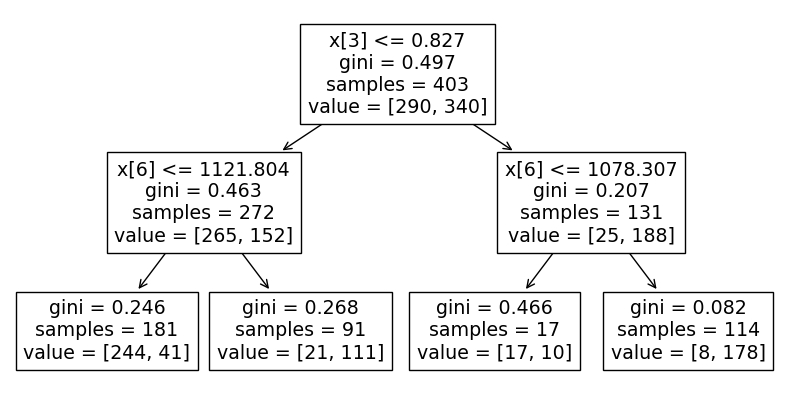

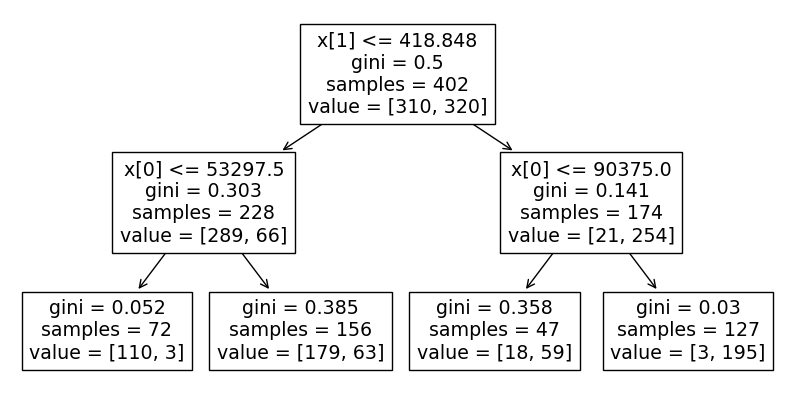

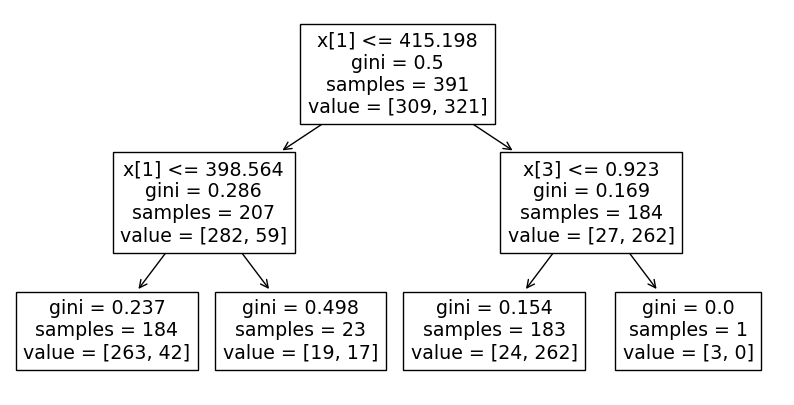

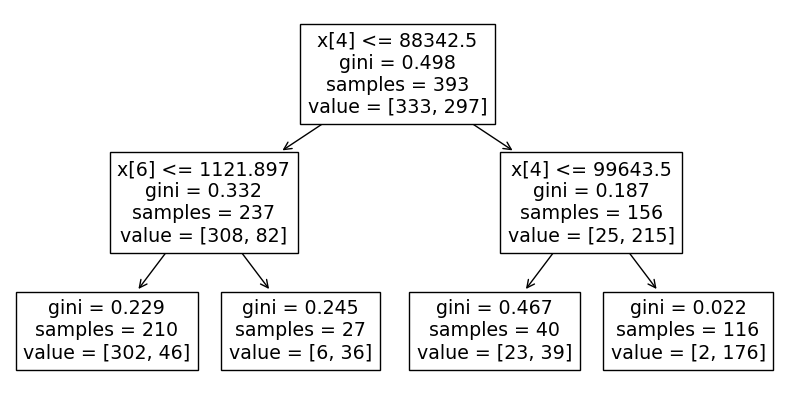

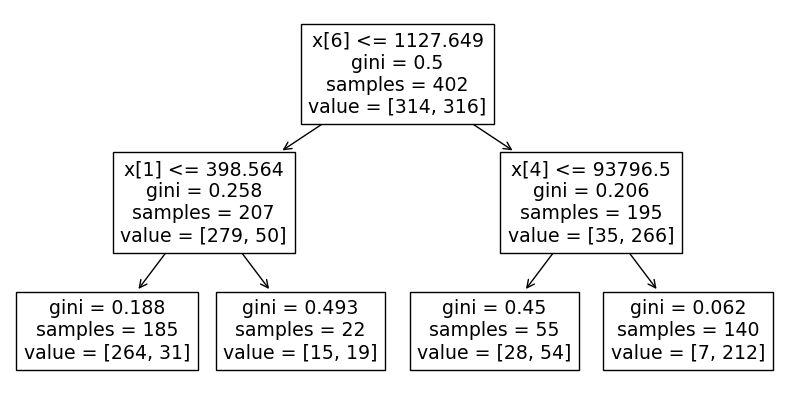

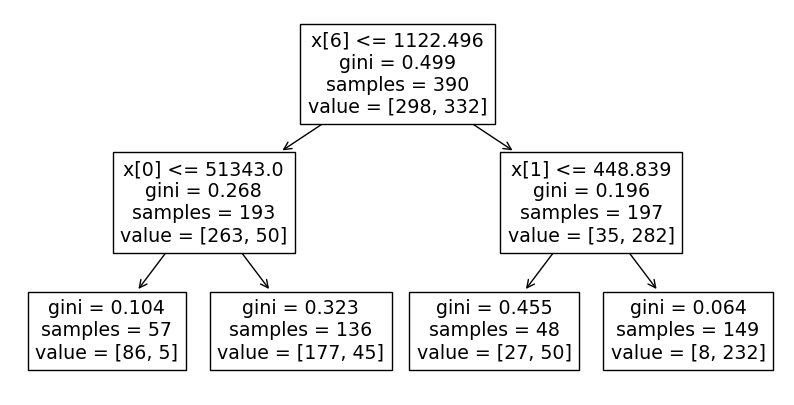

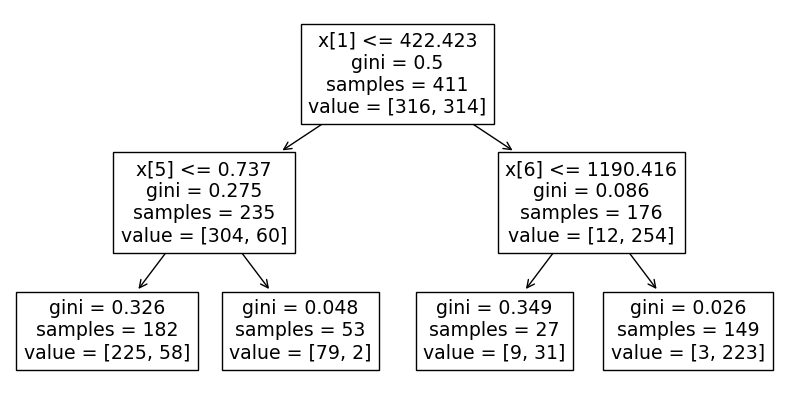

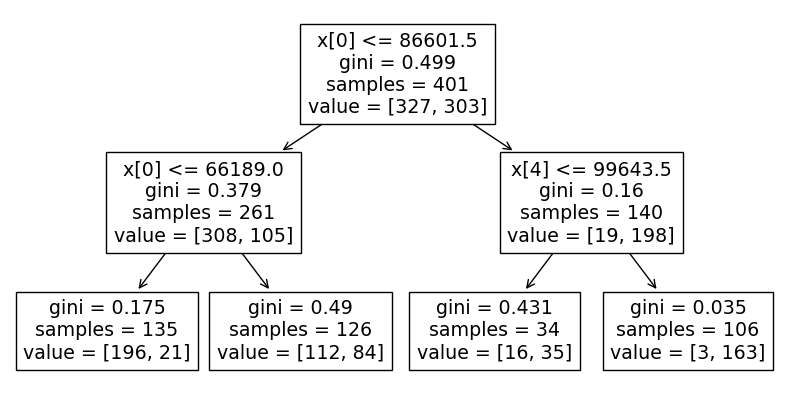

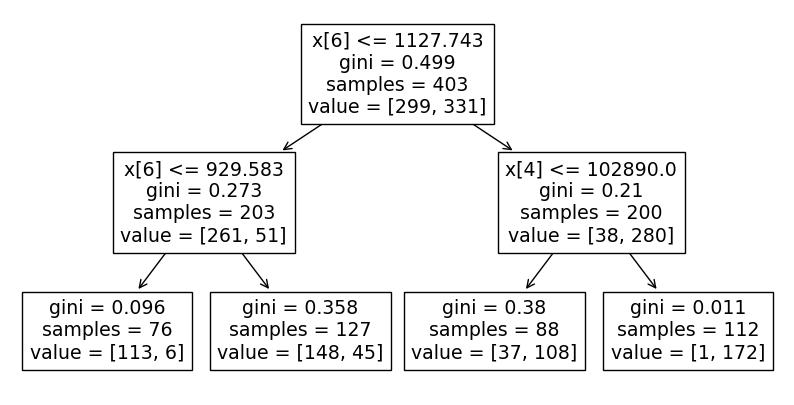

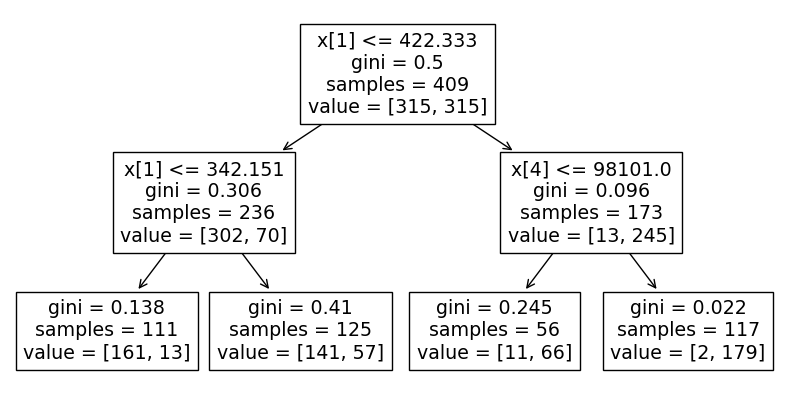

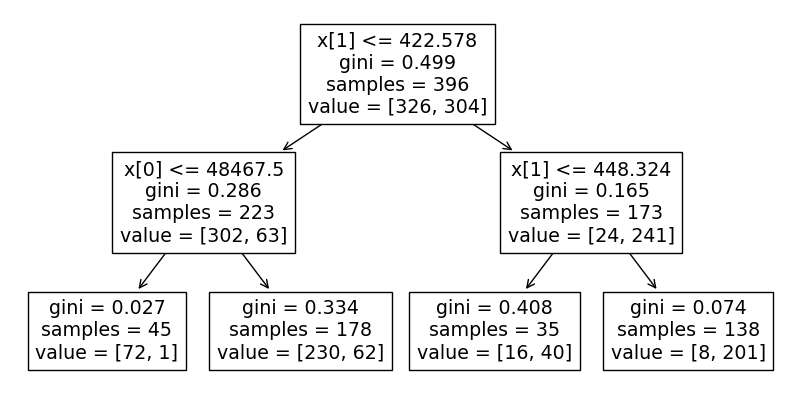

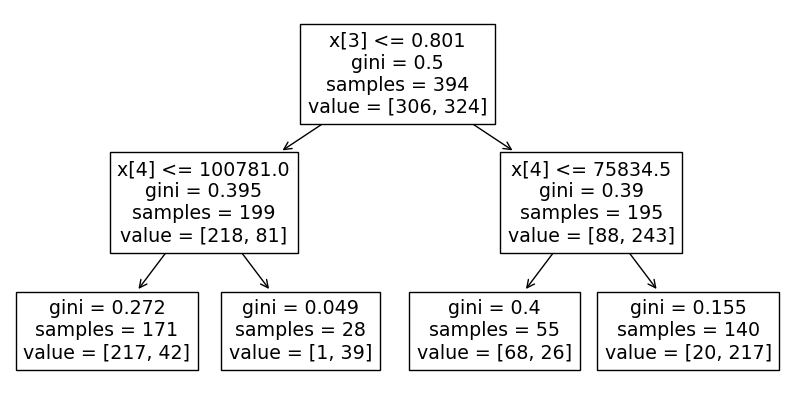

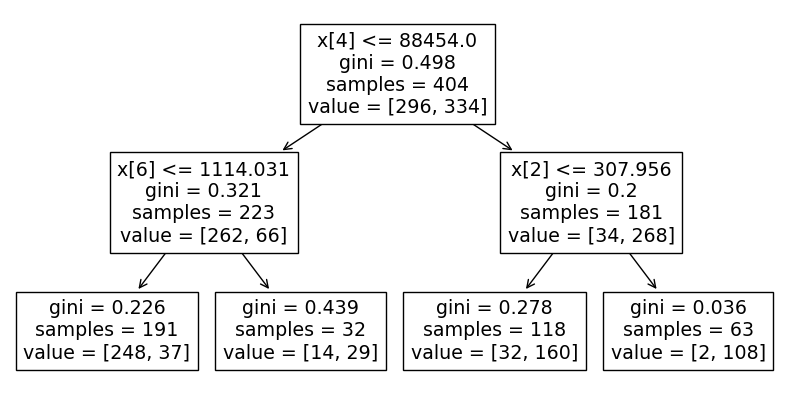

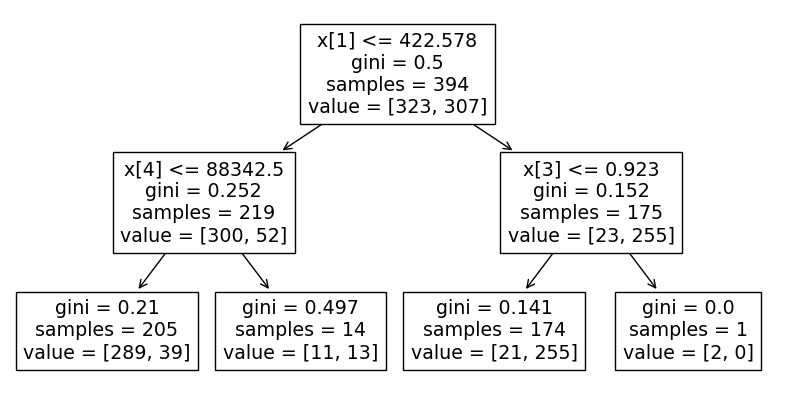

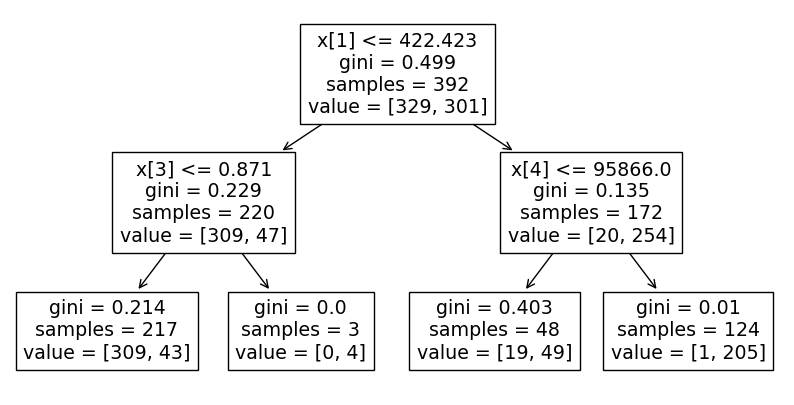

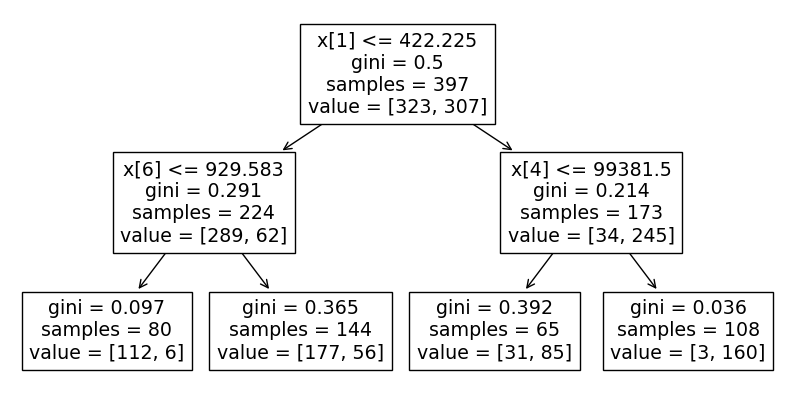

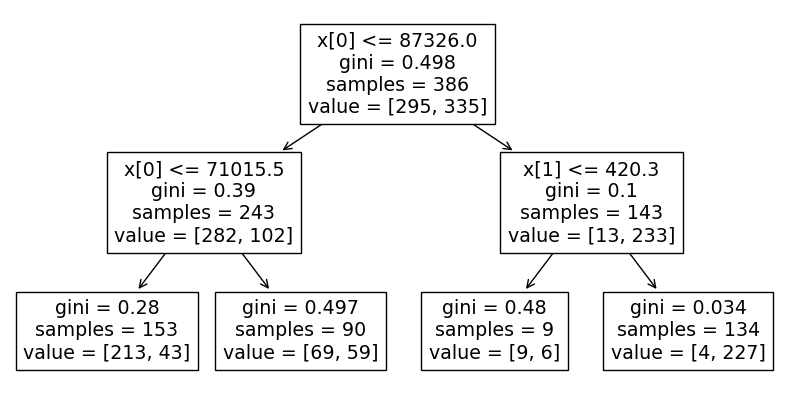

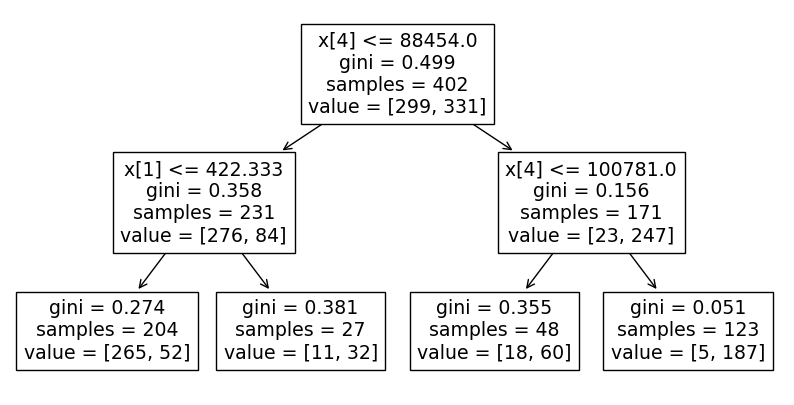

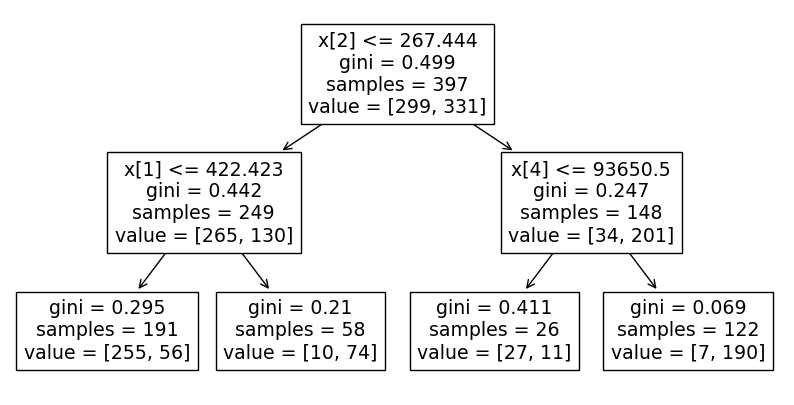

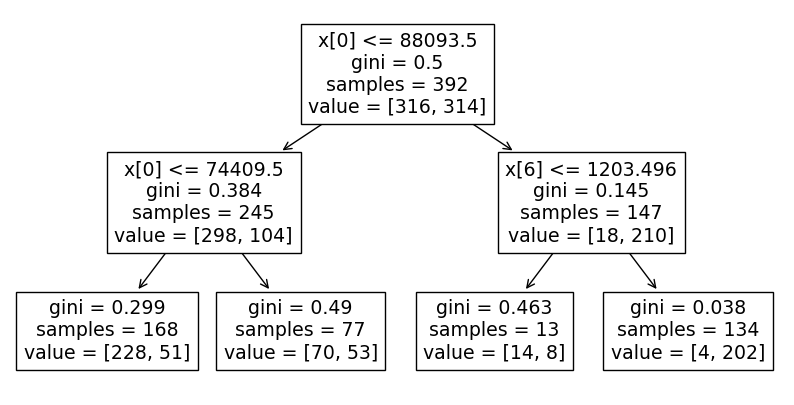

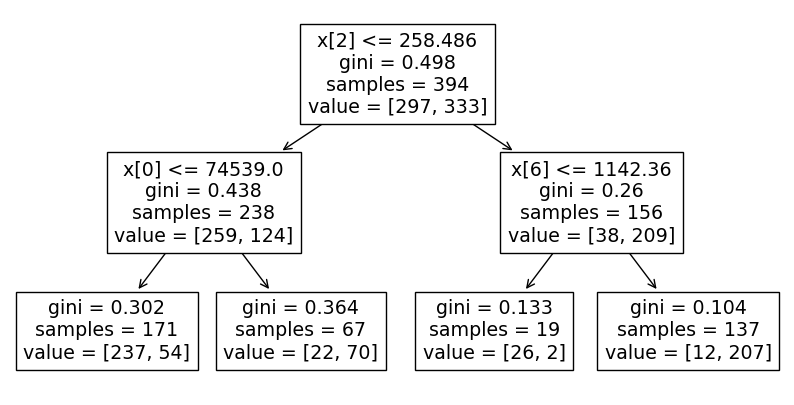

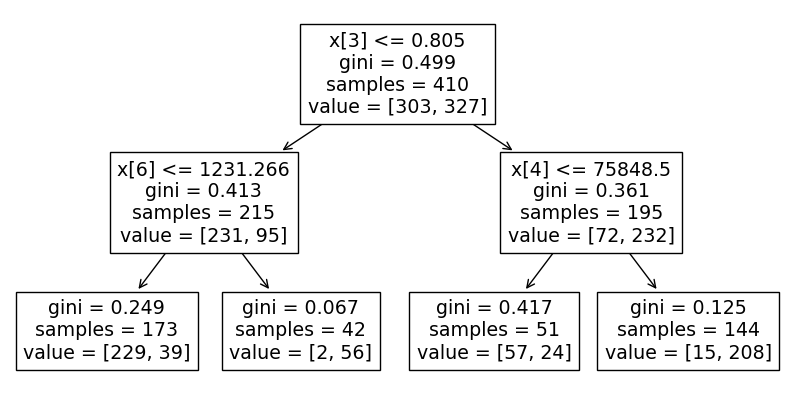

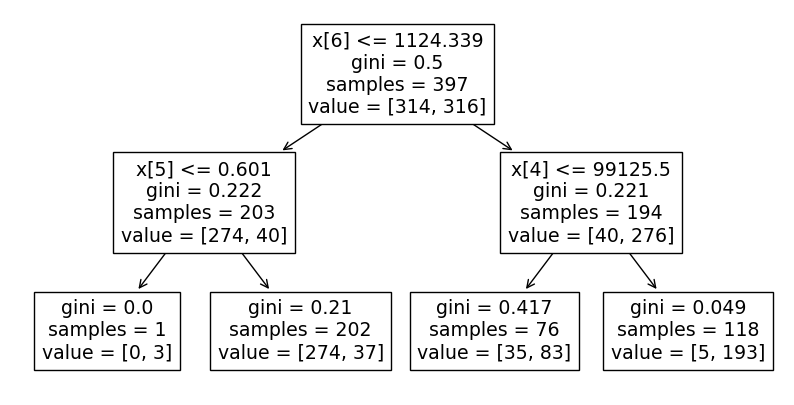

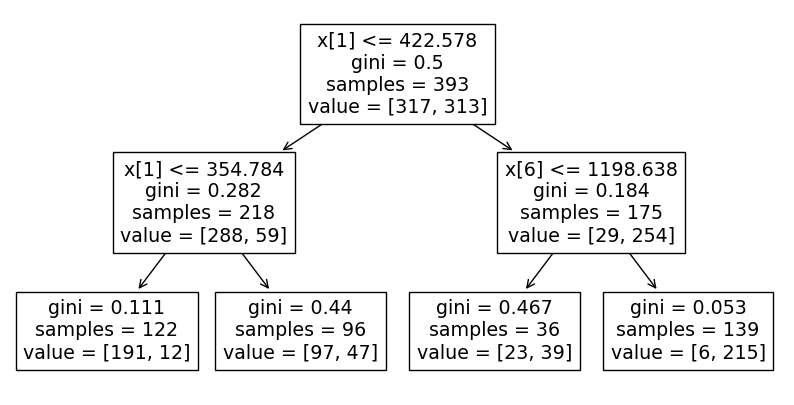

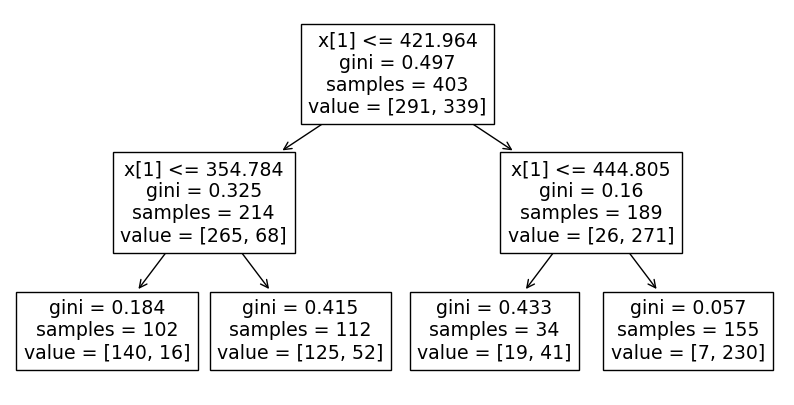

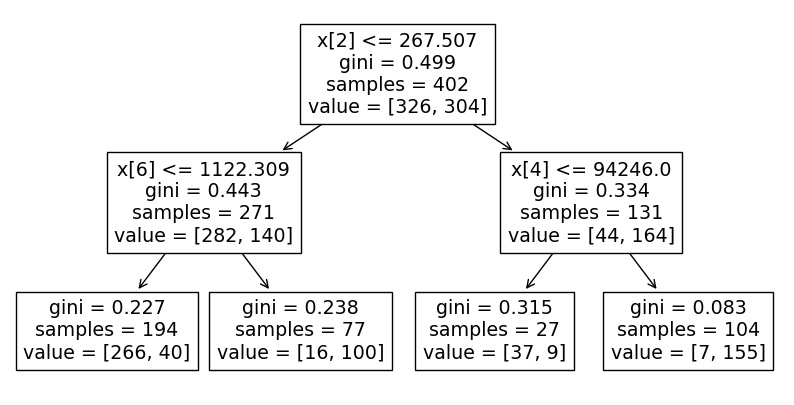

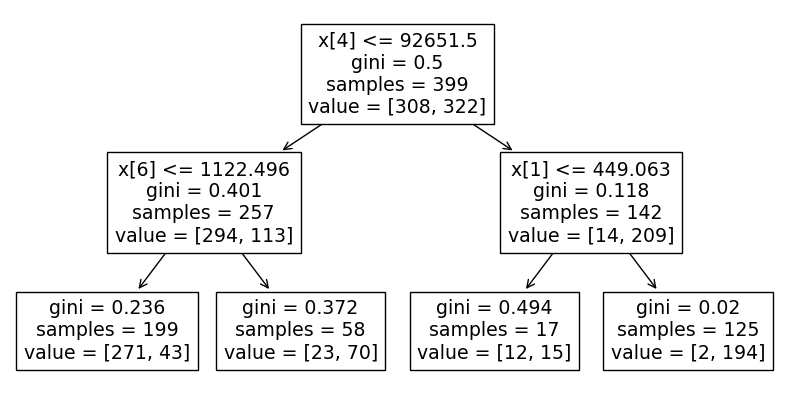

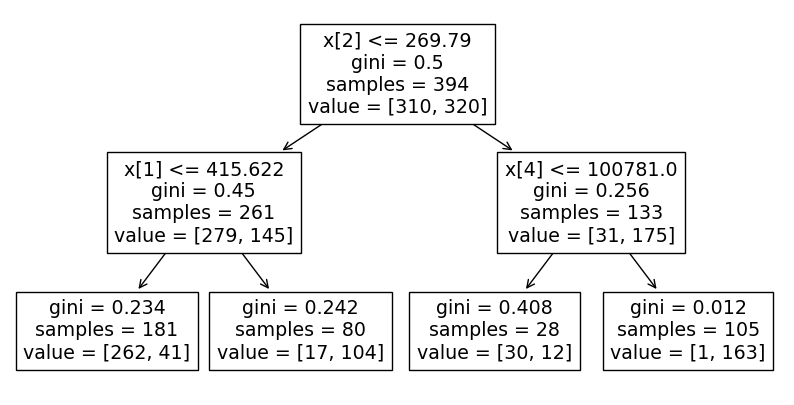

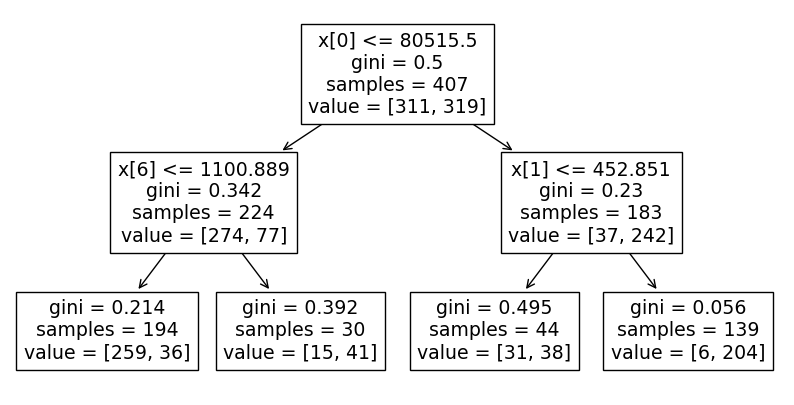

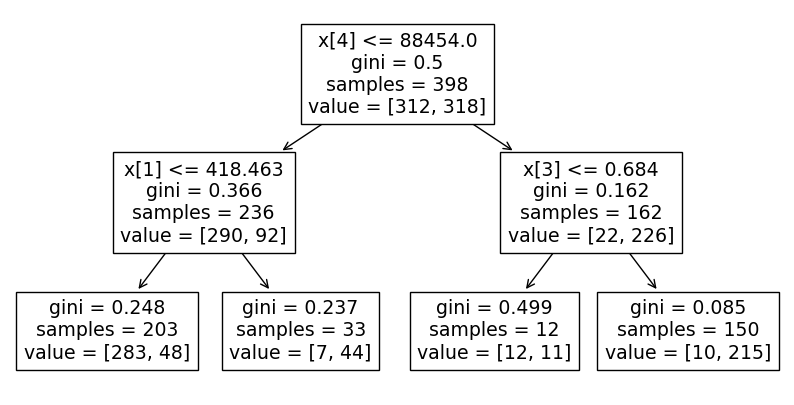

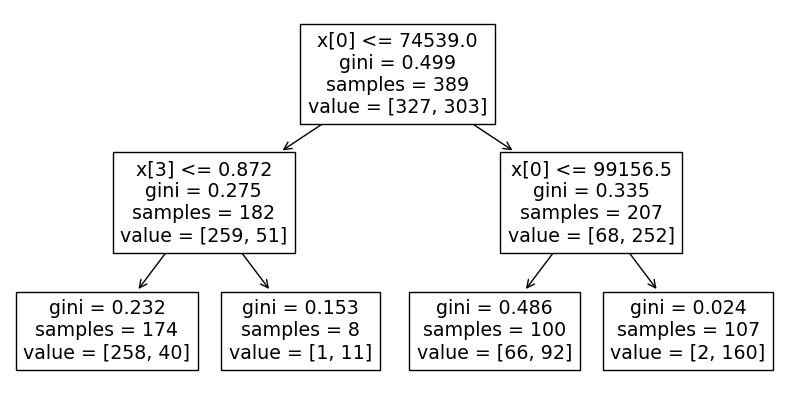

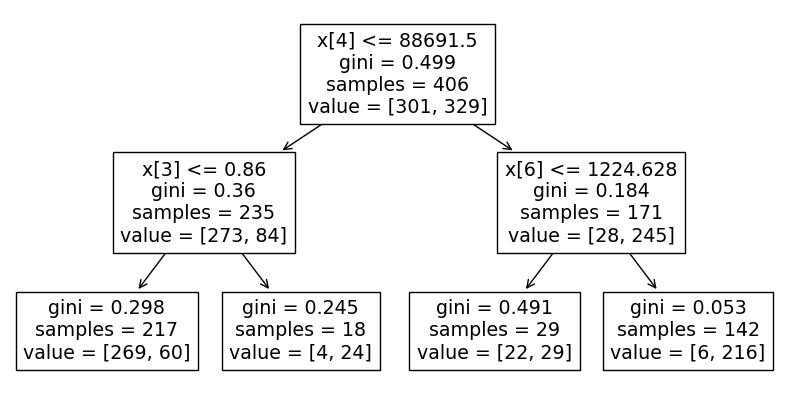

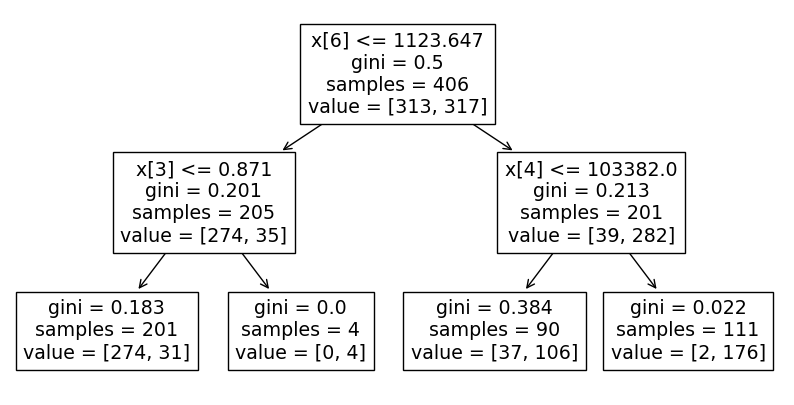

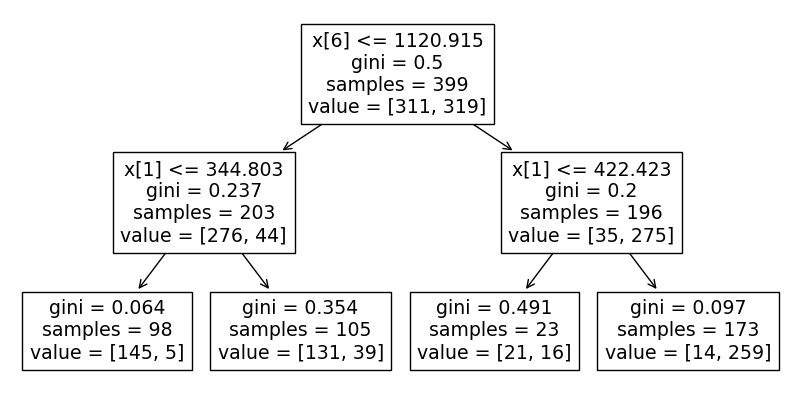

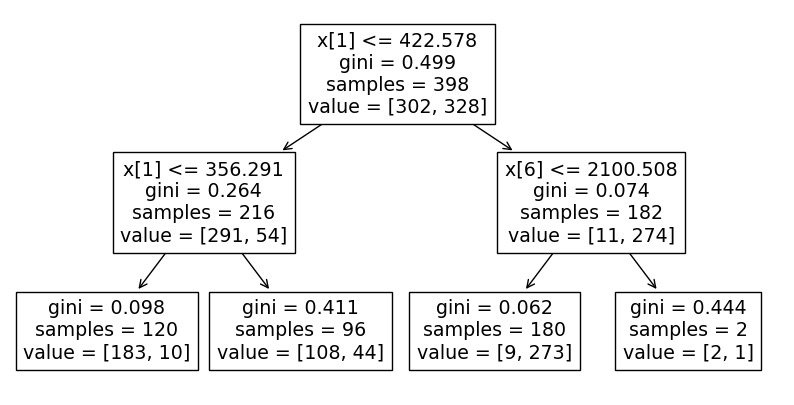

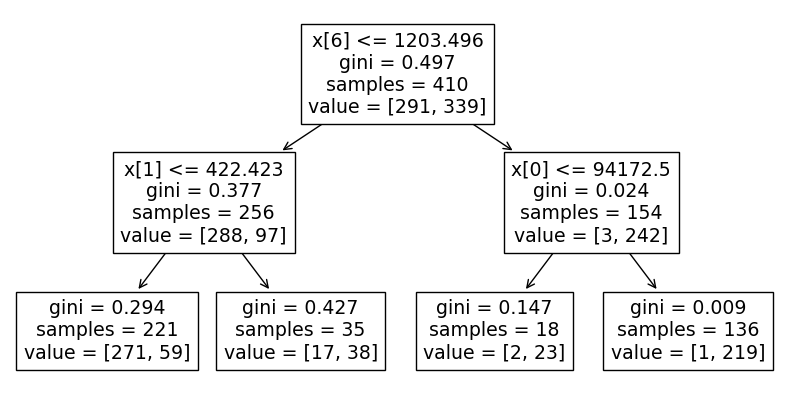

In [40]:
#Plot all the trees in the Random Forest model
from sklearn import tree
for i in range(len(rf_model.estimators_)):
    plt.figure(figsize = (10,5))
    tree.plot_tree(rf_model.estimators_[i])
    plt.show()

#Stratified K Fold

Because our dataset is small, using stratified KFold would be better compared with train_test_split.

As we can see from the below results, the random forest performed the best.

In [31]:
#Using the Stratified KFolds instead of Train-test split to eliminating selection bias.
from sklearn.model_selection import StratifiedKFold, cross_val_score
skf = StratifiedKFold(random_state = 42,\
            shuffle = True)

In [32]:
def Stratified_KFold_classification(model, X, y, cv):
    '''This function will process the user provided data and return the skf score.'''
    model = model
    scores = cross_val_score(model, X, y, cv = cv)
    print(f"LR Score: {scores}, \nScore mean: {np.mean(scores):.4f}, \nScore std: {np.std(scores):.4f}")

In [34]:
# Logistic regression
Stratified_KFold_classification(model = LogisticRegression(max_iter = 150), 
                X = X, 
                y = y, 
                cv = skf)

LR Score: [0.87777778 0.86666667 0.83333333 0.85555556 0.86666667], 
Score mean: 0.8600, 
Score std: 0.0151


In [36]:
# Support vector machine
Stratified_KFold_classification(model = SVC(), 
                X = X, 
                y = y, 
                cv = skf)

LR Score: [0.85       0.82222222 0.78888889 0.8        0.84444444], 
Score mean: 0.8211, 
Score std: 0.0239


In [37]:
# Kth Nearest Neighbor
Stratified_KFold_classification(model = KNeighborsClassifier(n_neighbors = 5), 
                X = X, 
                y = y, 
                cv = skf)

LR Score: [0.86666667 0.84444444 0.82777778 0.79444444 0.81666667], 
Score mean: 0.8300, 
Score std: 0.0245


In [38]:
# Naive Bayes
Stratified_KFold_classification(model = GaussianNB(), 
                X = X, 
                y = y, 
                cv = skf)

LR Score: [0.85555556 0.82777778 0.79444444 0.80555556 0.85      ], 
Score mean: 0.8267, 
Score std: 0.0239


In [39]:
# Random forest
Stratified_KFold_classification(model = rf_model, 
                X = X, 
                y = y, 
                cv = skf)

LR Score: [0.9        0.84444444 0.83333333 0.84444444 0.88333333], 
Score mean: 0.8611, 
Score std: 0.0258
